# Fastcampus 판매 분석

## 프로젝트 설명

- 강의를 환불하지 않은 **`고객(순구매자)`** 데이터를 타겟 변수로 지정
- 충성고객의 **기준**을 정한 뒤, 이들의 특성을 파악
- **시각화**를 이용하여 비교분석하면서 결론을 도출할 예정

**진행 계획**

* **결측치 전처리**
* **타겟 변수 선정**(`순 구매 테이블`)
* 타겟 변수를 가지고 **EDA** 진행<br>ex) 카테고리별 구매율, 시간별 구매율, 전체 구매율의 쿠폰 구매율 비율

**목표**

* **`순 구매 테이블`에서 충성 고객의 기준 선정**
* 기준에서 충성 고객과 일반 고객의 **수익 비율 분석**
* 분석 결과를 가지고 **결론 도출**

**일정**

- **`1차 아이데이션`**(**5/13**) : 주제 및 진행 방향 등 공유
- **`2차 아이데이션`**(**5/20**) : 진행 상황 공유
- **`최종 발표`**(**5/23**)는 당일에 랜덤 5개의 팀을 뽑아 발표.<br>**(각 팀의 발표 여부는 미리 알 수 없으니 모든 팀이 발표 준비까지 마쳐야 함!)**

## 초기 설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
# 주피터 노트북에 최적화 된 그래프 설정(코랩 사용불가)

# %matplotlib notebook
# 인터렉티브 그래프 가능(코랩 사용불가)

In [3]:
%config InlineBackend.figure_format = 'retina'

**주피터 노트북 matplotlib 한글 설정**

In [4]:
import os

# # Mac OS의 경우와 그 외 OS의 경우로 나누어 설정
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

**코랩 matplotlib 한글 설정**

In [5]:
# 네이버 나눔 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# 실행 후 런타입 재실행

In [6]:
# 런타임 재실행 후 적용
# plt.rc('font', family='NanumBarunGothic') 

**엑셀 불러오기 설정**

In [7]:
# !pip install openpyxl

테이블 시트 위치 설정

In [8]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

## 변수 설명

---

-Columns

---

|Columns|Content|
|:---|:---|
|id|해당 거래내역에 대한 ID(PK)|
|customer_id|결제한 고객 ID|
|course_id|강의 ID (프로모션에 대해서는 값이 할당X)|
|type|거래의 종류|
|state|거래에 대한 상태|
|course_title|강의 제목|
|category_title|대분류|
|format|온라인 강의의 기획 종류|
|completed_at|state가 COMPLETED로 변경된 시점|
|transaction_amount|최종 결제 금액|
|coupon_title|쿠폰 종류|
|coupon_discount_amount|쿠폰 할인 금액|
|sale_price|판매 금액|
|tax_free_amount|보안상 공유가 힘듬|
|pg|PG사 종류|
|method|결제 방식|
|subcategory_title|중분류|
|marketing_start_at|강의 판매 시점|

---

-Type 유형

---

|type|유형|
|:---|:---|
|<span style="color: red">ORDER</span>|<span style="color: red">DEPRECATED</span>|
|PAYMENT|결제|
|<span style="color: red">TRANSACTION</span>|<span style="color: red">B2B계약결제(무시해도 좋음)</span>|
|REFUND|환불|

---

-State 유형

---

|state|상태|
|:---|:---|
|COMPLETED|결제 완료|
|REQUESTED|고객에게 결제 요청|
|<span style="color: red">PENDING</span>|<span style="color: red">보안 이슈로 공개X</span>|
|<span style="color: red">CANCELLED</span>|<span style="color: red">보안 이슈로 공개X</span>|
|<span style="color: red">HIDDEN</span>|<span style="color: red">보안 이슈로 공개X</span>|
|<span style="color: red">DELETE</span>|<span style="color: red">보안 이슈로 공개X</span>|

# 데이터 분석

## 데이터 전처리

In [9]:
train = pd.read_excel("파이널프로젝트_RAW_210329_210926.xlsx")

In [10]:
df = train.copy()

In [11]:
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


### 결측값 확인 및 전처리

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

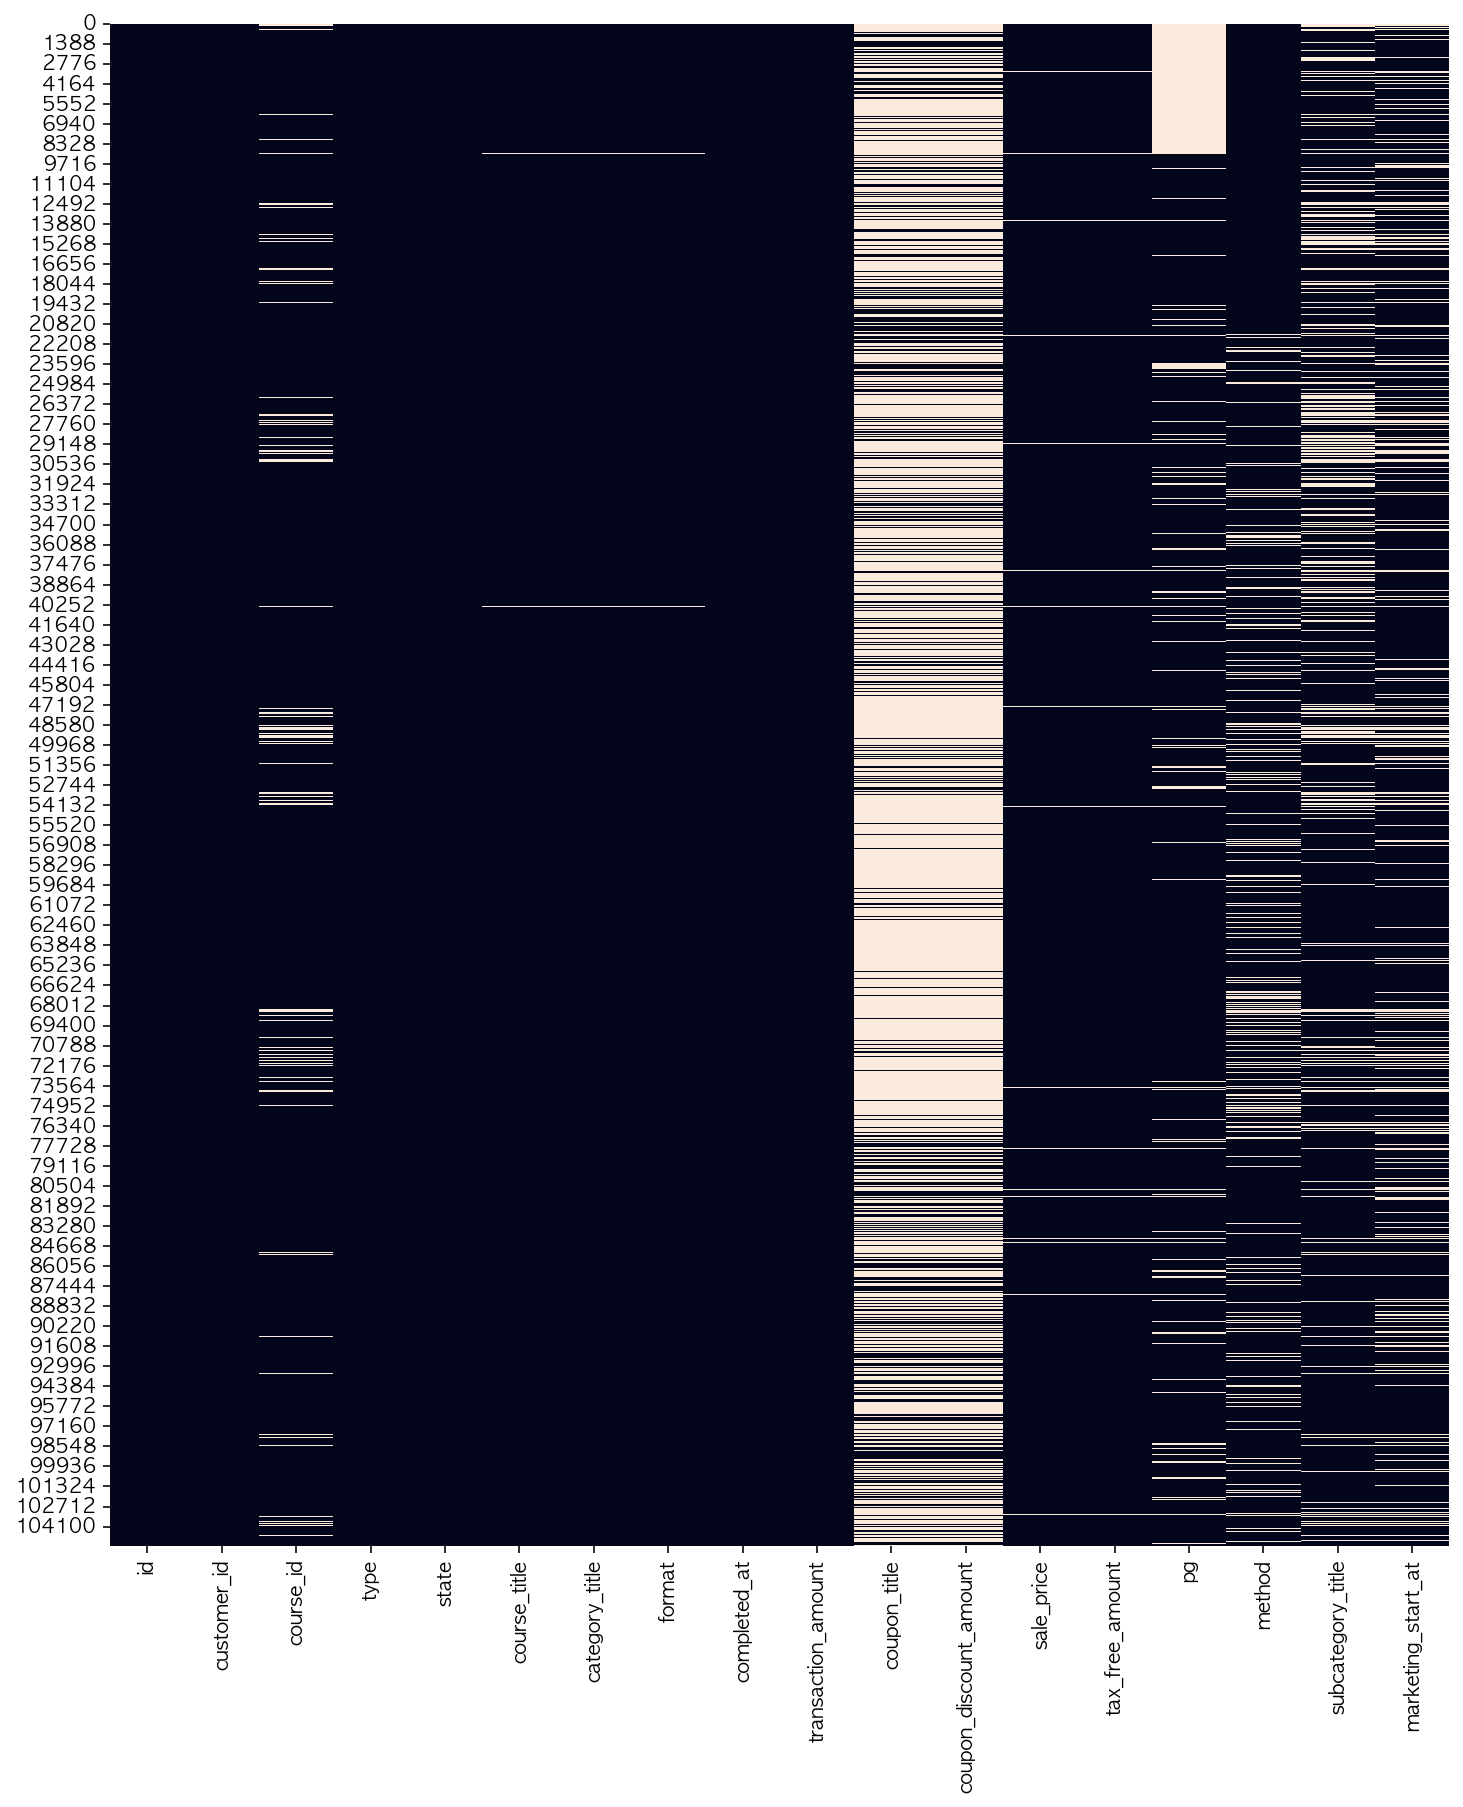

In [13]:
# 시각 자료를 이용해 결측치 확인
plt.figure(figsize=(12,14))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

확인 결과
- 컬럼별로 결측치가 많은 것을 확인할 수 있음
- 컬럼별로 결측치를 확인 진행

### customer_id

In [14]:
# 결측치 검색
df[df['customer_id'].isnull()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
12133,1011200,NaN,NaN,TRANSACTION,COMPLETED,NaN,NaN,NaN,2021-04-12 11:40:00,0,NaN,NaN,NaN,NaN,NaN,B2B_CONTRACT,NaN,NaT
36367,1066932,NaN,NaN,TRANSACTION,COMPLETED,NaN,NaN,NaN,2021-05-17 16:12:00,0,NaN,NaN,NaN,NaN,NaN,B2B_CONTRACT,NaN,NaT
91500,1299115,NaN,NaN,TRANSACTION,COMPLETED,NaN,NaN,NaN,2021-08-20 20:05:00,0,NaN,NaN,NaN,NaN,NaN,B2B_CONTRACT,NaN,NaT


- customer_id 의 결측치는 대부분 NaN이므로 삭제

In [15]:
df = df[df['customer_id'].isnull()==False] # 결측치 제거
df['customer_id'] = df['customer_id'].astype(int) # 정수형 변환

### course_title

1. course_title 결측치 확인

In [16]:
df[df['course_title'].isnull()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
9002,996843,490139,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,480000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
9003,996793,490089,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
9004,996842,490138,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
9005,996851,490149,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
12181,1006736,291328,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-12 13:10:10,967000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
13754,1012747,498414,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-15 20:40:35,170000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
31192,1063323,524510,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-05-10 18:04:33,35000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
38944,1093777,539708,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-05-22 10:57:39,127500,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
40377,1093780,539709,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-05-24 09:18:48,110000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
40378,1093784,539709,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-05-24 09:18:48,110000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT


In [17]:
# Payment-Completed 건이 있으나 문의 결과 제거해도 무관하다 하여 제거
df = df.dropna(subset=['course_title'])

2. "TEST", "테스트용" "검수용" 는 실제 구매 데이터가 아님. 처리 필요

2-1. 테스트용, TEST 제거

In [18]:
# 해당 조건에 맞는 값 추출
t = df[df["course_title"].str.contains("TEST") | df["course_title"].str.contains("테스트용")]
t

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
32619,1067141,496508,205233.0,ORDER,CANCELLED,(TEST) 오프라인 과세 상품 결제 테스트용 상품,관리,관리,2021-05-12 17:31:06,150000,NaN,NaN,150000.0,100000.0,NAVER,NaN,NaN,NaT
32620,1067142,496508,205233.0,PAYMENT,COMPLETED,(TEST) 오프라인 과세 상품 결제 테스트용 상품,관리,관리,2021-05-12 17:31:06,150000,NaN,NaN,150000.0,100000.0,NAVER,TRANS,NaN,NaT
51406,1129889,496508,NaN,ORDER,CANCELLED,(테스트용) 프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 ...,데이터사이언스,올인원,2021-06-09 15:51:44,990000,NaN,NaN,990000.0,176000.0,NAVER,NaN,NaN,NaT
51435,1129971,496508,NaN,PAYMENT,COMPLETED,(테스트용) 프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 ...,데이터사이언스,올인원,2021-06-09 16:32:25,990000,NaN,NaN,990000.0,176000.0,NAVER,CARD,NaN,NaT
51782,1131318,496508,NaN,REFUND,COMPLETED,(테스트용) 프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 ...,데이터사이언스,올인원,2021-06-10 11:20:35,-990000,NaN,NaN,990000.0,176000.0,NAVER,CARD,NaN,NaT
56001,1146954,496508,NaN,ORDER,CANCELLED,(테스트용) 프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 ...,데이터사이언스,올인원,2021-06-17 13:50:43,990000,NaN,NaN,990000.0,176000.0,NAVER,NaN,NaN,NaT
56137,1147445,496508,NaN,ORDER,CANCELLED,(테스트용) 프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 ...,데이터사이언스,올인원,2021-06-17 17:20:09,990000,NaN,NaN,990000.0,176000.0,NAVER,NaN,NaN,NaT


In [19]:
# 추려낸 이상치 값 전부 drop
df = df.drop(list(t.index))

2-2. 'A/B테스트', '코딩테스트' 제외한 '테스트' 항목 추가 제거
- 'A/B테스트', '코딩테스트'가 포함된 course_title의 경우, 실제 강의명 (테스트용이 아님)
- 해당 강의들을 제외하고 나머지 '테스트'가 포함된 row 제거

In [20]:
# 해당 단어가 포함된 course_id 검색
df[df["course_title"].str.contains("테스트")]["course_title"].unique()

array(['초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편',
       '네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트',
       '올인원 패키지 : A/B 테스트 탑재, 개인화 마케팅 끝장내기',
       '프로모션 : 2+2 코딩테스트 결과를 바꾸는 전공생 코딩 PASS (6월 프리패스)',
       '네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트', '(B2B) 경남대학교_코딩 테스트 대비반',
       '프로모션 : 코딩테스트 결과를 바꾸는 전공생 코딩 BEST PASS (7월 프리패스)',
       '(초격차변경)프로모션 : 코딩테스트 결과를 바꾸는 전공생 코딩 BEST PASS (7월 프리패스)',
       '프로모션 : 코딩테스트 결과를 바꾸는 전공생 코딩 iPad 패키지 (7월 현물 프리패스)',
       'The RED : 고객 경험을 개선하는 A/B테스트 기반 모바일 앱 개발 by 이승민'], dtype=object)

In [21]:
# 해당 강의의 transaction_amount 0원, sale_price는 1원이라 이상치라 판단, drop
df[df["course_title"].str.contains("네카라쿠배 프론트엔드 취업완성 스쿨")]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
30770,1062130,523886,205237.0,PAYMENT,COMPLETED,네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트,프로그래밍,스쿨,2021-05-10 10:58:57,0,NaN,NaN,1.0,1.0,NaN,PROMOTION,NaN,2019-04-19
30783,1062160,84972,205237.0,PAYMENT,COMPLETED,네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트,프로그래밍,스쿨,2021-05-10 11:11:21,0,NaN,NaN,1.0,1.0,NaN,PROMOTION,NaN,2019-04-19
30814,1062222,513608,205237.0,PAYMENT,COMPLETED,네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트,프로그래밍,스쿨,2021-05-10 11:39:56,0,NaN,NaN,1.0,1.0,NaN,PROMOTION,NaN,2019-04-19
30822,1062238,438870,205237.0,PAYMENT,COMPLETED,네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트,프로그래밍,스쿨,2021-05-10 11:50:03,0,NaN,NaN,1.0,1.0,NaN,PROMOTION,NaN,2019-04-19
30824,1062248,523942,205237.0,PAYMENT,COMPLETED,네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트,프로그래밍,스쿨,2021-05-10 11:55:30,0,NaN,NaN,1.0,1.0,NaN,PROMOTION,NaN,2019-04-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54402,1141156,546174,205715.0,PAYMENT,COMPLETED,네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트,프로그래밍,스쿨,2021-06-14 12:34:02,0,NaN,NaN,1.0,1.0,NaN,PROMOTION,NaN,2021-02-08
54447,1141335,67113,205715.0,PAYMENT,COMPLETED,네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트,프로그래밍,스쿨,2021-06-14 14:25:11,0,NaN,NaN,1.0,1.0,NaN,PROMOTION,NaN,2021-02-08
54491,1141485,523266,205715.0,PAYMENT,COMPLETED,네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트,프로그래밍,스쿨,2021-06-14 15:46:16,0,NaN,NaN,1.0,1.0,NaN,PROMOTION,NaN,2021-02-08
54611,1141900,560997,205237.0,PAYMENT,COMPLETED,네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트,프로그래밍,스쿨,2021-06-14 19:25:34,0,NaN,NaN,1.0,1.0,NaN,PROMOTION,NaN,2019-04-19


In [22]:
# 해당 강의들을 제외한 '테스트' 포함된 row 추려내기
t = df[~(df["course_title"].str.contains("A/B테스트"))&~(df["course_title"].str.contains("A/B 테스트"))&~(df["course_title"].str.contains("코딩 테스트"))&~(df["course_title"].str.contains("코딩테스트"))&df["course_title"].str.contains("테스트")]

In [23]:
# 추려낸 이상치 drop
df = df.drop(list(t.index))

### course_id

In [24]:
df[df['course_id'].isnull()].head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
6,970614,477910,NaN,ORDER,CANCELLED,프로모션 : 2021 내 커리어 지켜 줄 UX/UI 디자인 한끝세트 (3월 프리패스),크리에이티브,올인원,2021-03-28 15:22:36,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaT
12,970670,429291,NaN,ORDER,CANCELLED,프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-28 15:27:29,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaT
13,970672,429291,NaN,ORDER,CANCELLED,프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-28 15:30:05,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaT
16,970677,429291,NaN,ORDER,CANCELLED,프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-28 15:31:29,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaT
18,970682,478031,NaN,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaT


- 강의와 관련된 값 빼고 다른 값들이 정상적으로 들어있음
- 강의가 삭제되면서 데이터가 지워진 것으로 추정
- 결측치를 채우거나 삭제할 필요 X

### category_title

- category_title의 경우, null 값이 존재하나 값을 유추할 수 있는 row들이 존재
- 해당 값들은 따로 전처리
- 이 값들을 제외하고 drop

In [25]:
df[df['category_title'].isnull()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
41878,1078156,62566,NaN,REFUND,COMPLETED,프로모션 : 자유이용권 (3월),NaN,온라인,2021-05-26 22:06:00,-199000,NaN,NaN,199000.0,199000.0,NaN,TRANSFER,NaN,NaT
72639,1212937,591404,NaN,PAYMENT,COMPLETED,프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...,NaN,올인원,2021-07-12 23:38:42,990000,NaN,NaN,990000.0,272800.0,INICIS,CARD,NaN,NaT
74973,1223470,598011,NaN,ORDER,CANCELLED,프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...,NaN,올인원,2021-07-18 12:26:46,990000,NaN,NaN,990000.0,272800.0,INICIS,CARD,NaN,NaT
74975,1223480,598011,NaN,PAYMENT,COMPLETED,프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...,NaN,올인원,2021-07-18 12:31:01,990000,NaN,NaN,990000.0,272800.0,INICIS,CARD,NaN,NaT
74980,1223479,598011,NaN,ORDER,COMPLETED,프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...,NaN,올인원,2021-07-18 12:40:08,990000,NaN,NaN,990000.0,272800.0,INICIS,CARD,NaN,NaT
104056,1356347,561379,NaN,PAYMENT,CANCELLED,프로모션 : 영상편집 맥북 pro 패스(9월 현물 프리패스),NaN,올인원,2021-09-20 18:15:02,1800000,NaN,NaN,1800000.0,295200.0,INICIS,CARD,NaN,NaT
104318,1358067,617692,NaN,PAYMENT,CANCELLED,프로모션 : 영상편집 맥북 pro 패스(9월 현물 프리패스),NaN,올인원,2021-09-22 00:57:03,1800000,NaN,NaN,1800000.0,295200.0,NAVER,NaN,NaN,NaT
105189,1363817,83845,NaN,PAYMENT,CANCELLED,프로모션 : 영상편집 맥북 pro 패스(9월 현물 프리패스),NaN,올인원,2021-09-24 15:36:27,1800000,NaN,NaN,1800000.0,295200.0,INICIS,CARD,NaN,NaT


- customer_id = 62556 case
- course_title에 '자유이용권'이 포함되는 경우는 해당 row가 유일하며, 카테고리 분류가 애매하므로 해당 row는 drop.

- customer_id = 591404, 598011 case
- category_title 값 외에 다른 값들은 존재
- course_title에 '데이터사이언티스트' 란 단어가 포함되어 있음
- category_title을 '데이터사이언스'로 변경

In [26]:
# 인덱스(72639, 74945) 으로 접근
df.loc[72639, "category_title"] = "데이터사이언스"
df.loc[74975, "category_title"] = "데이터사이언스"

- 이 외의 값들은 유추가 어렵거나 불가능, 실제 거래도 X
- 불필요한 값이므로 drop

In [27]:
df = df.dropna(subset=["category_title"])

### subcategory_title

In [28]:
df[df['subcategory_title'].isnull()].head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2,970657,72297,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
6,970614,477910,NaN,ORDER,CANCELLED,프로모션 : 2021 내 커리어 지켜 줄 UX/UI 디자인 한끝세트 (3월 프리패스),크리에이티브,올인원,2021-03-28 15:22:36,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaT
10,970671,469860,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,CARD,NaN,2020-11-27
11,970668,469860,203644.0,ORDER,CANCELLED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,CARD,NaN,2020-11-27


- 서브카테고리가 null일 경우, 상위 카테고리로 대체 가능
- 결측치 상위 카테고리로 대체

In [29]:
df.loc[df['subcategory_title'].isnull(),"subcategory_title"] = df.loc[df['subcategory_title'].isnull(),"category_title"]

### coupon_title
- course_title과 마찬가지로, 테스트 값 존재
- 해당 값들 선별 후 drop

In [30]:
t = df[~df["coupon_title"].isnull()]
t1 = t[t['coupon_title'].str.contains("검수용")] # 검수용
t2 = t[t['coupon_title'].str.contains("테스트") | t['coupon_title'].str.contains("TEST")] # 테스트

- coupon_title에 "검수용"이 포함된 경우 drop

In [31]:
df = df.drop(list(t1.index))

- coupon_title에 "테스트","TEST"가 포함된 경우


- '테스트'가 포함된 값들 중에 테스트용이 아닌 값들 존재
- 해당 값들 제외하고 drop

In [32]:
t2

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
4061,981775,122150,203530.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 반복 업무 자동화,업무 생산성,올인원,2021-03-31 18:03:06,0,[무료수강권] CRM팀 테스트용_김경진 개인계정 (이메일 인증 안 된 계정),99000.0,99000.0,99000.0,NaN,PROMOTION,업무자동화,NaT
13468,1010992,272087,203527.0,PAYMENT,COMPLETED,올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & ...,프로그래밍,올인원,2021-04-15 09:35:07,0,[내부직원] 테스트용 결제 쿠폰,99000.0,99000.0,99000.0,NaN,PROMOTION,프론트엔드 개발,2021-04-07 00:00:00
16499,1020941,272087,203527.0,PAYMENT,COMPLETED,올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & ...,프로그래밍,올인원,2021-04-21 14:40:13,0,[내부직원] 테스트용 결제 쿠폰,99000.0,99000.0,99000.0,NaN,PROMOTION,프론트엔드 개발,2021-04-07 00:00:00
17564,1024940,23171,202845.0,PAYMENT,COMPLETED,글로벌 엑스퍼트 : GAN 딥러닝 완벽 가이드 with 글로벌 엔지니어,데이터사이언스,올인원,2021-04-23 16:17:23,0,테스트쿠폰,165500.0,165500.0,165500.0,NaN,PROMOTION,딥러닝/인공지능,2020-07-27 00:00:00
20596,1033275,23171,204035.0,PAYMENT,COMPLETED,바이블 : 파이썬 기초부터 시작하는 딥러닝 영상인식,데이터사이언스,올인원,2021-04-27 13:29:02,0,테스트쿠폰,119000.0,119000.0,119000.0,NaN,PROMOTION,딥러닝/인공지능,2021-04-07 00:00:00
20785,1033745,23171,203532.0,PAYMENT,COMPLETED,연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 딥러닝 300제+,데이터사이언스,올인원,2021-04-27 16:49:11,0,테스트쿠폰,92000.0,92000.0,92000.0,NaN,PROMOTION,딥러닝/인공지능,2021-02-22 00:00:00
30792,1062177,116292,202357.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인을 위한 파이썬 데이터분석,데이터사이언스,올인원,2021-05-10 11:21:49,0,TEST이제너두_직장인을 위한 파이썬 데이터 분석,123500.0,123500.0,123500.0,NaN,PROMOTION,데이터분석,2020-03-13 00:00:00
31673,1064451,23171,204774.0,PAYMENT,COMPLETED,기초 회화부터 비즈니스 영어 10분컷,업무 생산성,하루10분컷,2021-05-11 11:25:38,0,TEST,20300.0,20300.0,20300.0,NaN,PROMOTION,업무 생산성,2021-04-28 00:00:00
32384,1066458,23171,200486.0,PAYMENT,COMPLETED,올인원 패키지 : 모두를 위한 SQL/DB,데이터사이언스,올인원,2021-05-12 11:41:39,0,테스트쿠폰,126000.0,126000.0,126000.0,NaN,PROMOTION,데이터사이언스,2019-04-04 00:00:00
33173,1068738,69255,203934.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편,프로그래밍,올인원,2021-05-13 14:21:39,0,[무료수강권] 초격차 패키지: 한 번에 끝내는 코딩테스트 369 Java편_이준희 강사님,90000.0,90000.0,90000.0,NaN,PROMOTION,개발자 커리어,2021-04-14 00:00:00


In [33]:
t2['coupon_title'].unique()

array(['[무료수강권] CRM팀 테스트용_김경진 개인계정 (이메일 인증 안 된 계정)', '[내부직원] 테스트용 결제 쿠폰',
       '테스트쿠폰', 'TEST이제너두_직장인을 위한 파이썬 데이터 분석', 'TEST',
       '[무료수강권] 초격차 패키지: 한 번에 끝내는 코딩테스트 369 Java편_이준희 강사님', '호준 테스트',
       '이웅모 강사님 강의 준비용 쿠폰 발급_초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편',
       '[테스트쿠폰] 네이버 페이 간편결제 테스트용 쿠폰', '테스트_전지현', '[CX] 관리자 외 계정 테스트용',
       '테스트', '[cs팀] 테스트 결제 위한 쿠폰 발급',
       '[30%쿠폰] The RED 고객 경험을 개선하는 A/B테스트 기반 모바일 앱 개발 신규 강의 할인'],
      dtype=object)

- '30%쿠폰~', '초격차 패키지: 한 번에 끝내는 코딩테스트 369 Java편_이준희 강사님' 
- 두 케이스는 실제 강의 이므로 해당 강의들 제외하고 Drop

In [34]:
t3 = t2.loc[~t2['coupon_title'].str.startswith("[30%쿠폰]")]
t3 = t3.drop(33173) # 이준희 강사

In [35]:
df = df.drop(list(t3.index))

### PAYMENT, REFUND (타겟 변수)

In [36]:
df['purchased'] = (df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')

- payment-completed인 값 purchased column에 추가 (bool)

In [37]:
pt = df[(df['type']=='PAYMENT')&(df['state']=='COMPLETED')] # 구매 데이터
rt = df[(df['type']=='REFUND')&(df['state']=='COMPLETED')] # 환불 데이터

- 환불 데이터는 구매 데이터에 포함됨

In [38]:
paid = list(zip(pt['customer_id'].astype(float), pt['course_id'].astype(float)))
ref = list(zip(rt['customer_id'].astype(float), rt['course_id'].astype(float), rt['id']))

- 전처리를 위한 필요 컬럼데이터 추출

In [39]:
# 중요!
# [customer_id],[course_id]가 일치하는 값 = 환불 후 재구매하지 않은 케이스
# 이 외의 다른 케이스는 쿠폰 등을 사용하여 재결제 했을 가능성 있음 -> 순수 환불이 아님
# 'payment-completed'와 'refund-completed'의 [customer_id],[course_id] 비교
# 결과 값을 real_ref에 담아둔다 

real_ref = []
for i in range(len(paid)):
  for j in range(len(ref)):
    if paid[i][0] == ref[j][0] and paid[i][1] == ref[j][1]:
      real_ref.append(ref[j])
      ref.remove(ref[j])
      break

In [40]:
print(len(paid),len(real_ref),len(ref))

51743 1927 1893


- 총 결제 수 / 순수 환불 건수 / order-refund pair, 재구매, 기업강의환불 등 기타 이유

payment-completed 의 refund-completed (순수 환불) 환불데이터만  따로 분리

In [41]:
# real_refund (순수 환불 건수) Data 확인
t = np.array(real_ref)
rt = rt[rt['id'].isin(t[:,2])]
rt

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,purchased
759,972662,271507,204246.0,REFUND,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-29 10:28:46,-171810,NaN,NaN,190900.0,190900.0,NaN,CARD,프로그래밍,2021-03-04 00:00:00,False
1165,973680,498409,203782.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 모션그래픽,영상/3D,올인원,2021-03-29 14:39:49,-139000,NaN,NaN,139000.0,139000.0,NaN,CARD,모션그래픽,2021-01-22 00:00:00,False
1170,973686,462160,203328.0,REFUND,COMPLETED,올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵,디자인,올인원,2021-03-29 14:41:27,-77600,NaN,NaN,87600.0,87600.0,NaN,CARD,디자인툴,2020-10-23 00:00:00,False
1198,973764,474332,203720.0,REFUND,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-29 14:58:53,-111000,NaN,NaN,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02 00:00:00,False
1367,974226,475655,204037.0,REFUND,COMPLETED,매주)서비스 기획서 완성 온라인 완주반 2101,크리에이티브,온라인 완주반,2021-03-29 17:23:15,-367000,NaN,NaN,417000.0,417000.0,NaN,CARD,크리에이티브,2021-01-14 00:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105133,1363558,656066,205761.0,REFUND,COMPLETED,초격차 패키지 : 한 번에 끝내는 디지털 마케팅,마케팅,올인원,2021-09-24 13:33:08,-213000,NaN,NaN,233000.0,233000.0,INICIS,CARD,디지털마케팅,2021-08-17 00:00:00,False
105139,1363576,648937,204013.0,REFUND,COMPLETED,올인원 패키지 : 완전정복 시각디자인 기초,디자인,올인원,2021-09-24 13:43:57,-72000,NaN,NaN,174000.0,174000.0,NAVER,CARD,시각디자인,2021-03-16 00:00:00,False
105168,1363704,670215,204670.0,REFUND,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-09-24 14:32:43,-171000,NaN,NaN,171000.0,171000.0,NAVER,TRANS,글쓰기/카피라이팅,2021-06-18 17:00:00,False
105245,1364149,604077,205569.0,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,NaN,NaN,129000.0,129000.0,KAKAO,POINT,엑셀/VBA,2021-08-17 00:00:00,False


In [42]:
51743-1927

49816

payment-completed 테이블에서 이와 짝이 맞는 refund 값을 빼주면 49816이 나와야 한다

In [43]:
for i in range(len(df)):
  a = float(df.iloc[i,1]) # = customer_id
  b = float(df.iloc[i,2]) # = course_id
  if df.iloc[i,18] == True: # = purchased = True인 값
    for j in range(len(real_ref)): # 값 비교
      if real_ref[j][0] == a and real_ref[j][1] == b: # 환불 리스트에 해당 customer_id, course_id 있을 경우
          df.iloc[i,18] = False # True에서 False로 변경
          real_ref.remove(real_ref[j]) # 중복 방지를 위해 해당 값 삭제
          break

* purchased = True 값 중 환불이 이뤄진 경우 -> 최종적으로 구매한 값 X
* 데이터 내 purchased = True인 값 중 real_ref와 값이 겹칠 경우 False로 바꿈

In [44]:
df['purchased'].value_counts()

False    54418
True     49816
Name: purchased, dtype: int64

- 성공적으로 줄어든 모습 확인

In [45]:
# 순 구매 건 확인
pt = df[df['purchased'] == True]
pt

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,purchased
2,970657,72297,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,프로그래밍,2021-03-04,True
4,970658,478028,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14,True
8,970669,478033,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,True
10,970671,469860,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,CARD,부동산/금융,2020-11-27,True
18,970682,478031,NaN,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,데이터사이언스,NaT,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,1364969,669238,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23,True
105412,1364976,384003,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,149000.0,KAKAO,CARD,영상 편집,2020-12-02,True
105413,1364991,670891,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31,True
105416,1364996,640697,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15,True


### format

- B2B, B2G의 경우 개인 구매가 아니기 때문에 구매 횟수와 금액에 대하여 개인과 다른 양상을 보임.
- 따로 분석할 필요가 있음

- format == 'B2B','B2G' 따로 추출

In [46]:
# format의 경우 null값이 없음 -> 곧바로 전처리
pt.isnull().sum()

id                            0
customer_id                   0
course_id                  1978
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title              27097
coupon_discount_amount    27097
sale_price                 1065
tax_free_amount            1065
pg                         8516
method                        0
subcategory_title             0
marketing_start_at         9045
purchased                     0
dtype: int64

In [47]:
# b2b 테이블 추출
pt_b2b = pt[pt['format'].str.contains("B2B")]
rt_b2b = rt[rt['format'].str.contains("B2B")]
pt_b2b

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,purchased
631,972364,478743,204039.0,PAYMENT,COMPLETED,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 08:52:36,100000,NaN,NaN,NaN,NaN,NaN,TRANSFER,교육,NaT,True
633,972365,478745,203352.0,PAYMENT,COMPLETED,(B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사,교육,B2B 온라인,2021-03-29 08:57:12,750000,NaN,NaN,NaN,NaN,NaN,TRANSFER,교육,NaT,True
1035,973331,479082,204387.0,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:01:32,600000,NaN,NaN,600000.0,600000.0,NaN,CARD,교육,NaT,True
1046,973363,474327,204387.0,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:08:38,600000,NaN,NaN,600000.0,600000.0,NaN,CARD,교육,NaT,True
1135,973592,479185,204387.0,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 14:13:27,600000,NaN,NaN,600000.0,600000.0,NaN,CARD,교육,NaT,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104831,1361297,669386,207667.0,PAYMENT,COMPLETED,(B2B) 건강한선택권 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,390000,NaN,NaN,NaN,NaN,NaN,TRANSFER,교육,NaT,True
104832,1361312,669400,207555.0,PAYMENT,COMPLETED,(B2B) 케리케이온 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,1200000,NaN,NaN,NaN,NaN,NaN,TRANSFER,교육,NaT,True
104905,1367252,672301,207714.0,PAYMENT,COMPLETED,(B2B) (주)공정씨컴퍼니 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 17:33:18,2000000,NaN,NaN,NaN,NaN,NaN,ONSITE,교육,NaT,True
105163,1367258,672307,207731.0,PAYMENT,COMPLETED,(B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-24 14:26:08,600000,NaN,NaN,NaN,NaN,NaN,ONSITE,교육,NaT,True


In [48]:
# b2g 테이블 추출
pt_b2g = pt[pt['format'].str.contains("B2G")]
rt_b2g = rt[rt['format'].str.contains("B2G")]
pt_b2g

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,purchased
76521,1228790,467567,205419.0,PAYMENT,COMPLETED,(B2B) K-Digital Training 핀테크 서비스 프론트엔드 개발 과정 1기,프로그래밍,B2G,2021-07-20 12:32:15,859290,NaN,NaN,859290.0,859290.0,INICIS,CARD,프로그래밍,NaT,True
84609,1267969,623766,206746.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 07:36:20,20000,NaN,NaN,20000.0,20000.0,KAKAO,CARD,프로그래밍,NaT,True
84732,1268687,622246,206847.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 15:01:04,30000,NaN,NaN,30000.0,30000.0,INICIS,CARD,프로그래밍,NaT,True
84819,1269278,33540,206847.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 19:35:52,30000,NaN,NaN,30000.0,30000.0,INICIS,CARD,프로그래밍,NaT,True
84944,1270030,625050,206847.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-07 13:12:13,30000,NaN,NaN,30000.0,30000.0,INICIS,CARD,프로그래밍,NaT,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105215,1363994,670297,207651.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_6기,프로그래밍,B2G,2021-09-24 16:29:55,30000,NaN,NaN,30000.0,30000.0,INICIS,CARD,프로그래밍,NaT,True
105255,1364240,277200,207654.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit Java & SpringBoot로 시작하는...,프로그래밍,B2G,2021-09-24 17:48:08,40000,NaN,NaN,40000.0,40000.0,INICIS,CARD,프로그래밍,NaT,True
105330,1364604,668910,207652.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit 머신러닝 & AI 첫걸음 시작하기_6기,프로그래밍,B2G,2021-09-24 23:39:18,30000,NaN,NaN,30000.0,30000.0,KAKAO,CARD,프로그래밍,NaT,True
105392,1364863,666665,207652.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit 머신러닝 & AI 첫걸음 시작하기_6기,프로그래밍,B2G,2021-09-25 11:21:54,30000,NaN,NaN,30000.0,30000.0,INICIS,CARD,프로그래밍,NaT,True


기업강의 구매 데이터가 1894건이 있다.<br>
이 데이터는 기업에서 한 번에 교육강의를 구매한 것이라서 가격이 큰편이다.
* 따로 분리가 필요

In [49]:
pt = pt.drop(list(pt_b2b.index))
pt = pt.drop(list(pt_b2g.index))
rt = rt.drop(list(rt_b2b.index))
rt = rt.drop(list(rt_b2g.index))

pt_b2b 테이블로 분리 후 pt에서 b2b 데이터 제거(선택)

## 카테고리별 판매량

In [50]:
pt['category_title'].value_counts()

프로그래밍       15246
데이터사이언스      6606
업무 생산성       6428
디자인          5441
영상/3D        4937
마케팅          4506
부동산/금융       2759
투자/재테크       1420
크리에이티브        791
지식콘텐츠          23
비즈니스           21
파이낸스           16
데이터 사이언스        5
Name: category_title, dtype: int64

공백 문자 제거 필요

In [51]:
def func(x):
    return x.replace(" ", "")

pt['category_title'] = pt['category_title'].apply(func)

In [52]:
def func(x):
    return x.replace(" ", "")

rt['category_title'] = rt['category_title'].apply(func)

In [53]:
pt['category_title'].value_counts() # .nunique()

프로그래밍      15246
데이터사이언스     6611
업무생산성       6428
디자인         5441
영상/3D       4937
마케팅         4506
부동산/금융      2759
투자/재테크      1420
크리에이티브       791
지식콘텐츠         23
비즈니스          21
파이낸스          16
Name: category_title, dtype: int64

In [54]:
rt['category_title'].value_counts()

프로그래밍      635
디자인        244
데이터사이언스    224
영상/3D      200
마케팅        172
업무생산성      166
부동산/금융      83
투자/재테크      63
크리에이티브      35
Name: category_title, dtype: int64

하위 4개 카테고리는 수치가 너무 작아 기타로 묶어주거나 다른 카테고리로 넣어줘야함

카테고리는 14개 존재하고,
1 프로그래밍, 2 데이터사이언스, 3 업무 생산성, 4 디자인, 5 영상/3D, 6 마케팅 순으로 많이 팔렸다.

In [55]:
pd.pivot_table(data=pd.concat([pt, rt]), index = ['category_title', "subcategory_title"], values = 'transaction_amount', aggfunc = "sum")

transaction_amount
category_title subcategory_title                    
데이터사이언스        데이터 사이언스                      1550000
               데이터분석                       215670272
               데이터사이언스                     335034373
               데이터엔지니어링                     48980800
               딥러닝/인공지능                    281744370
               머신러닝                        107704085
디자인            UX/UI                       155729026
               디자인                          10000000
               디자인툴                        210506204
               시각디자인                       111672781
               일러스트                        174605517
마케팅            SNS마케팅                       54609726
               글쓰기/카피라이팅                   203994141
               데이터마케팅                      100387672
               디지털마케팅                       94546081
               마케팅                         143310034
부동산/금융         금융/투자 실무                    163832145
               부동산 개발                       67275450
               부동산/금융                       40205500
               회계/재무/세무                    199270865
비즈니스           비즈니스                          5689865
업무생산성          PPT/보고서                     190723250
               리더십                          33336080
               업무 생산성                      121386786
               업무자동화                        45200655
               엑셀/VBA                      183713459
               커뮤니케이션                        3988100
영상/3D          VFX                          51938979
               게임 그래픽                       28042500
               모션그래픽                       103890159
               영상 편집                       354523240
               영상/3D                         3600000
지식콘텐츠          지식콘텐츠                         4970000
크리에이티브         크리에이티브                      252615450
투자/재테크         부동산 투자                       46604634
               주식 투자                       226392096
파이낸스           파이낸스                          5280000
프로그래밍          DevOps                      139334714
               개발자 커리어                     247550911
               게임                           88258612
               모바일앱                        170510026
               백엔드 개발                      287616878
               코딩 입문                        37120075
               프로그래밍                       402119785
               프론트엔드 개발                    288558100

결제 테이블 + 환불 테이블의 카테고리별 총합 금액

Text(0, 0.5, 'sales')

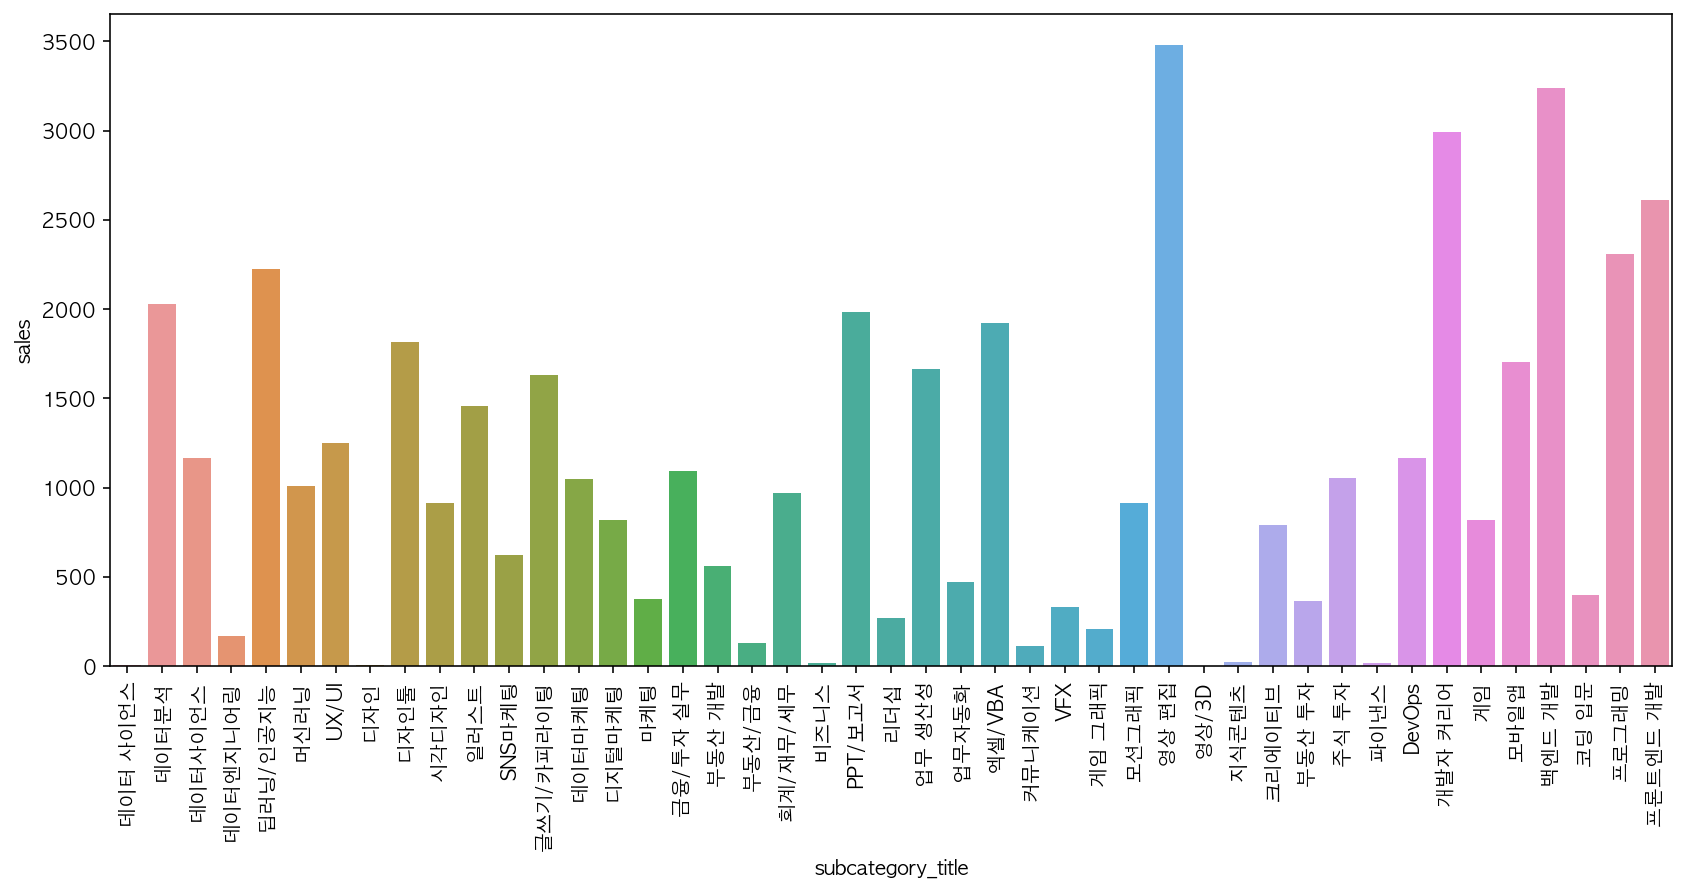

In [56]:
t = pd.pivot_table(data=pt, index = ['category_title','subcategory_title'], values=['id'],  aggfunc = "count").reset_index()
plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
sns.barplot(data=t, x="subcategory_title", y="id")
plt.ylabel("sales")

하위 카테고리별 결제 건수

<AxesSubplot:xlabel='category_title', ylabel='id'>

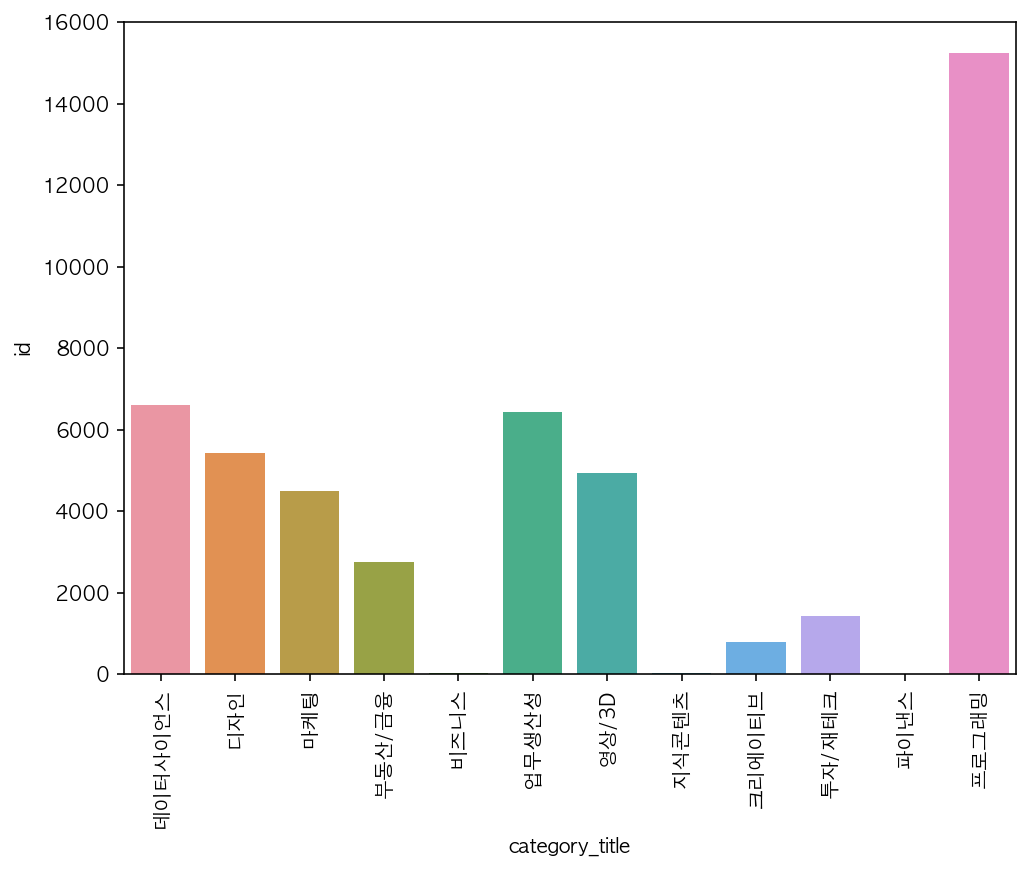

In [57]:
t2 = t.groupby("category_title").agg({"id": "sum"}).reset_index()
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.barplot(data=t2, x="category_title", y="id")

카테고리별 거래 건수

In [58]:
rt[rt['category_title']=='교육']

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,purchased


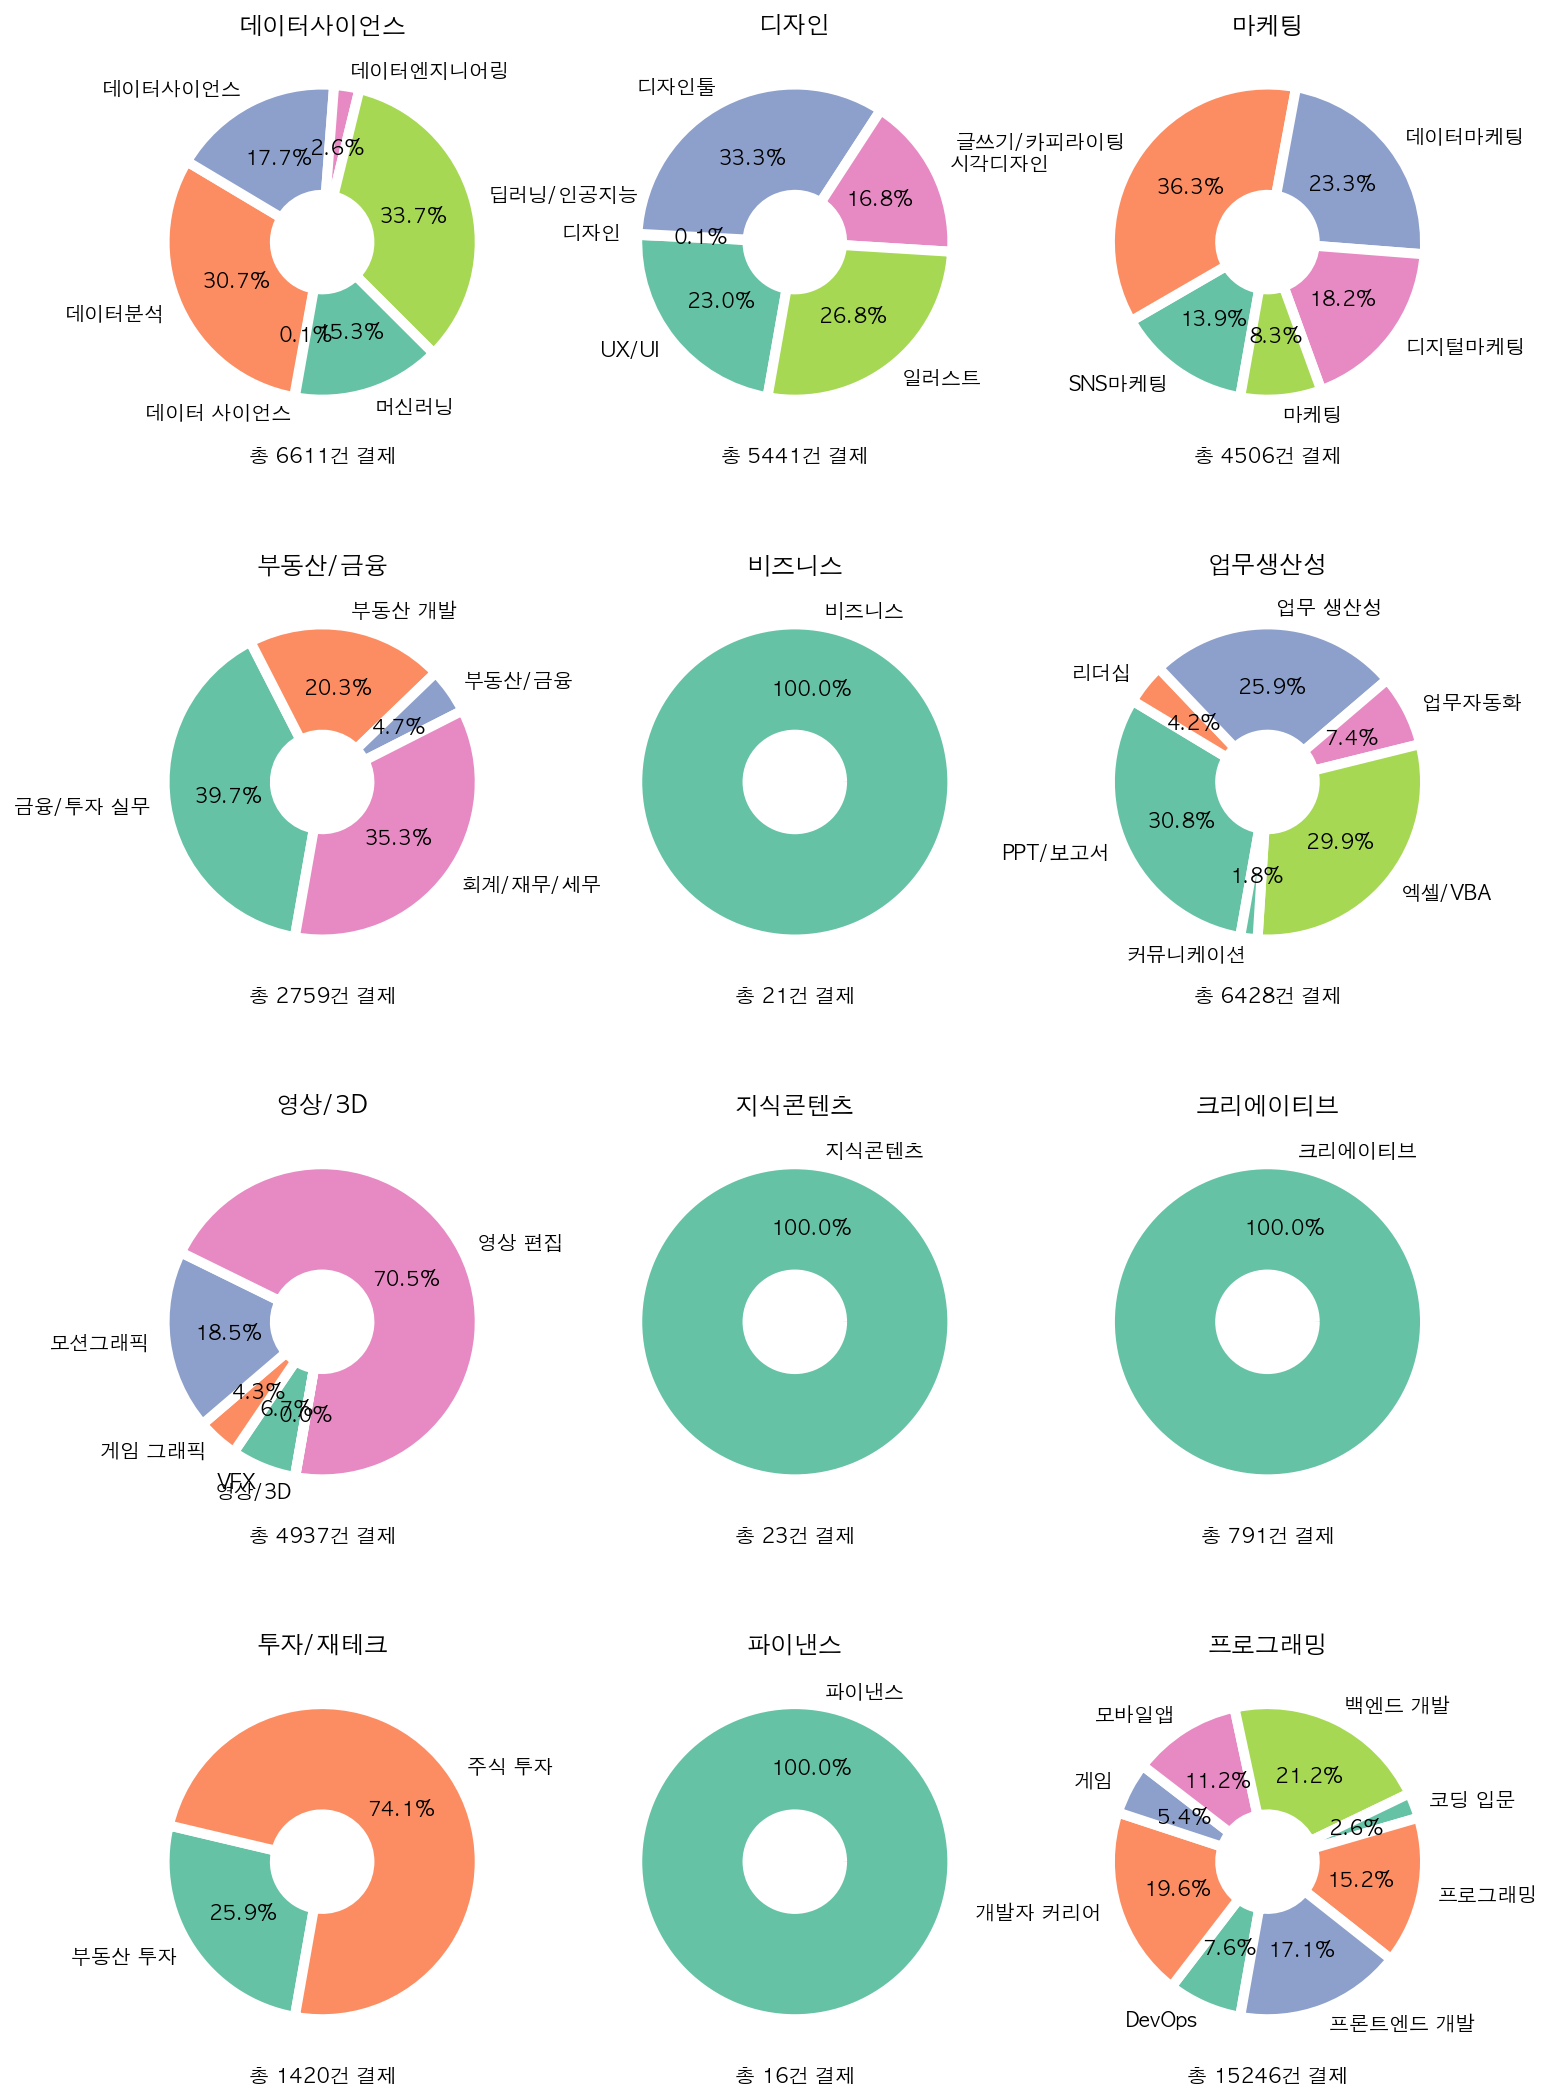

In [59]:
t = pd.pivot_table(data=pt, index = ['category_title','subcategory_title'], values=['id'],  aggfunc = "count").reset_index()
ct = list(t['category_title'].unique())
plt.figure(figsize=(12,24))
colors = sns.color_palette('Set2')[0:5]
for i, title in enumerate(ct):
    plt.subplot(5, 3, i+1)
    plt.title(f"{title}")
    t1 = t[t['category_title']==title]
    plt.pie(t1['id'], labels=t1['subcategory_title'], autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
    plt.xlabel(f"총 {t1['id'].sum()}건 결제")
plt.show()

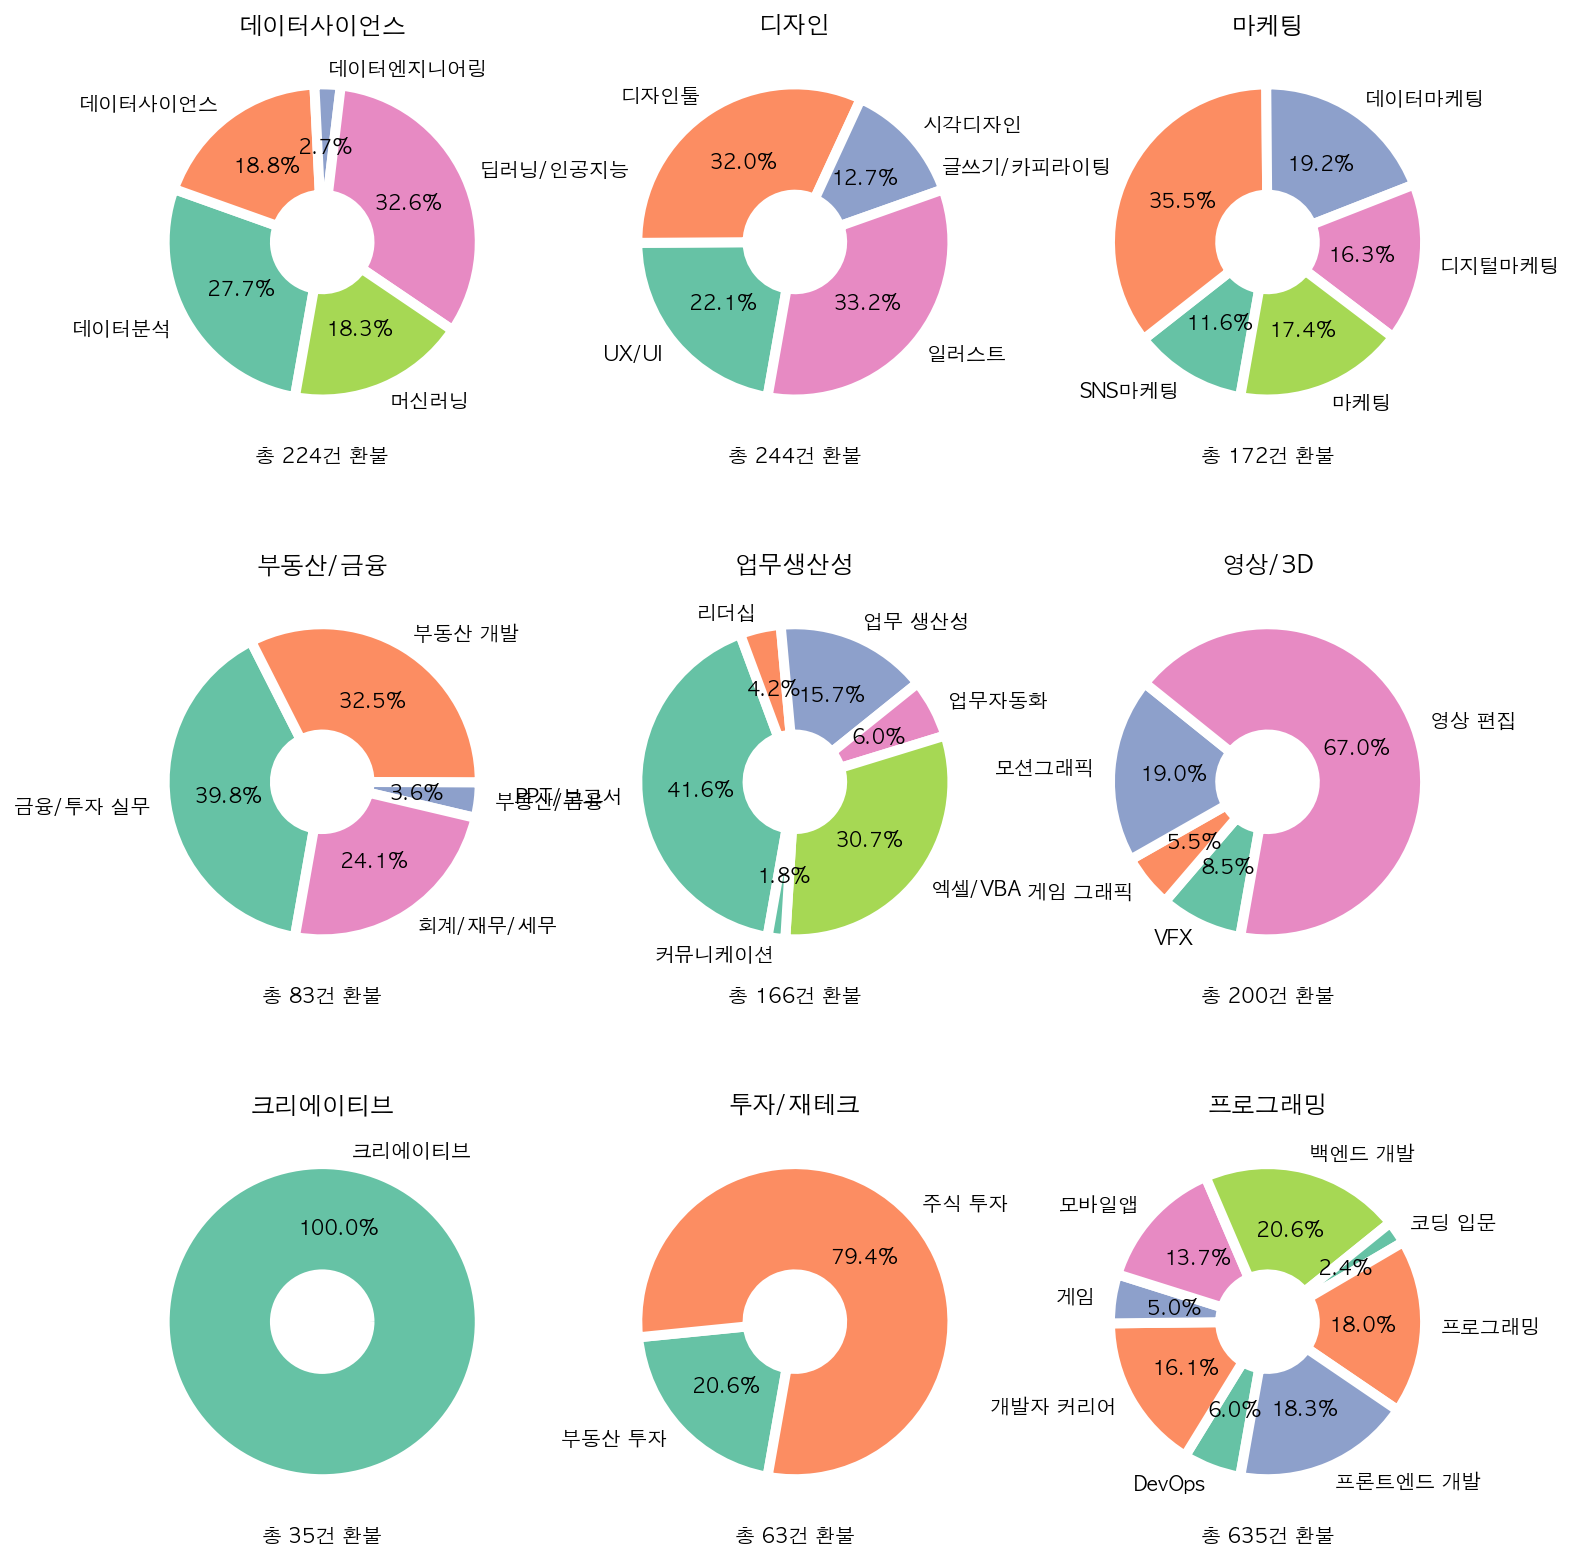

In [60]:
t = pd.pivot_table(data=rt, index = ['category_title','subcategory_title'], values=['id'],  aggfunc = "count").reset_index()
ct = list(t['category_title'].unique())
plt.figure(figsize=(12,24))
colors = sns.color_palette('Set2')[0:5]
for i, title in enumerate(ct):
    plt.subplot(5, 3, i+1)
    plt.title(f"{title}")
    t1 = t[t['category_title']==title]
    plt.pie(t1['id'], labels=t1['subcategory_title'], autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
    plt.xlabel(f"총 {t1['id'].sum()}건 환불")
plt.show()

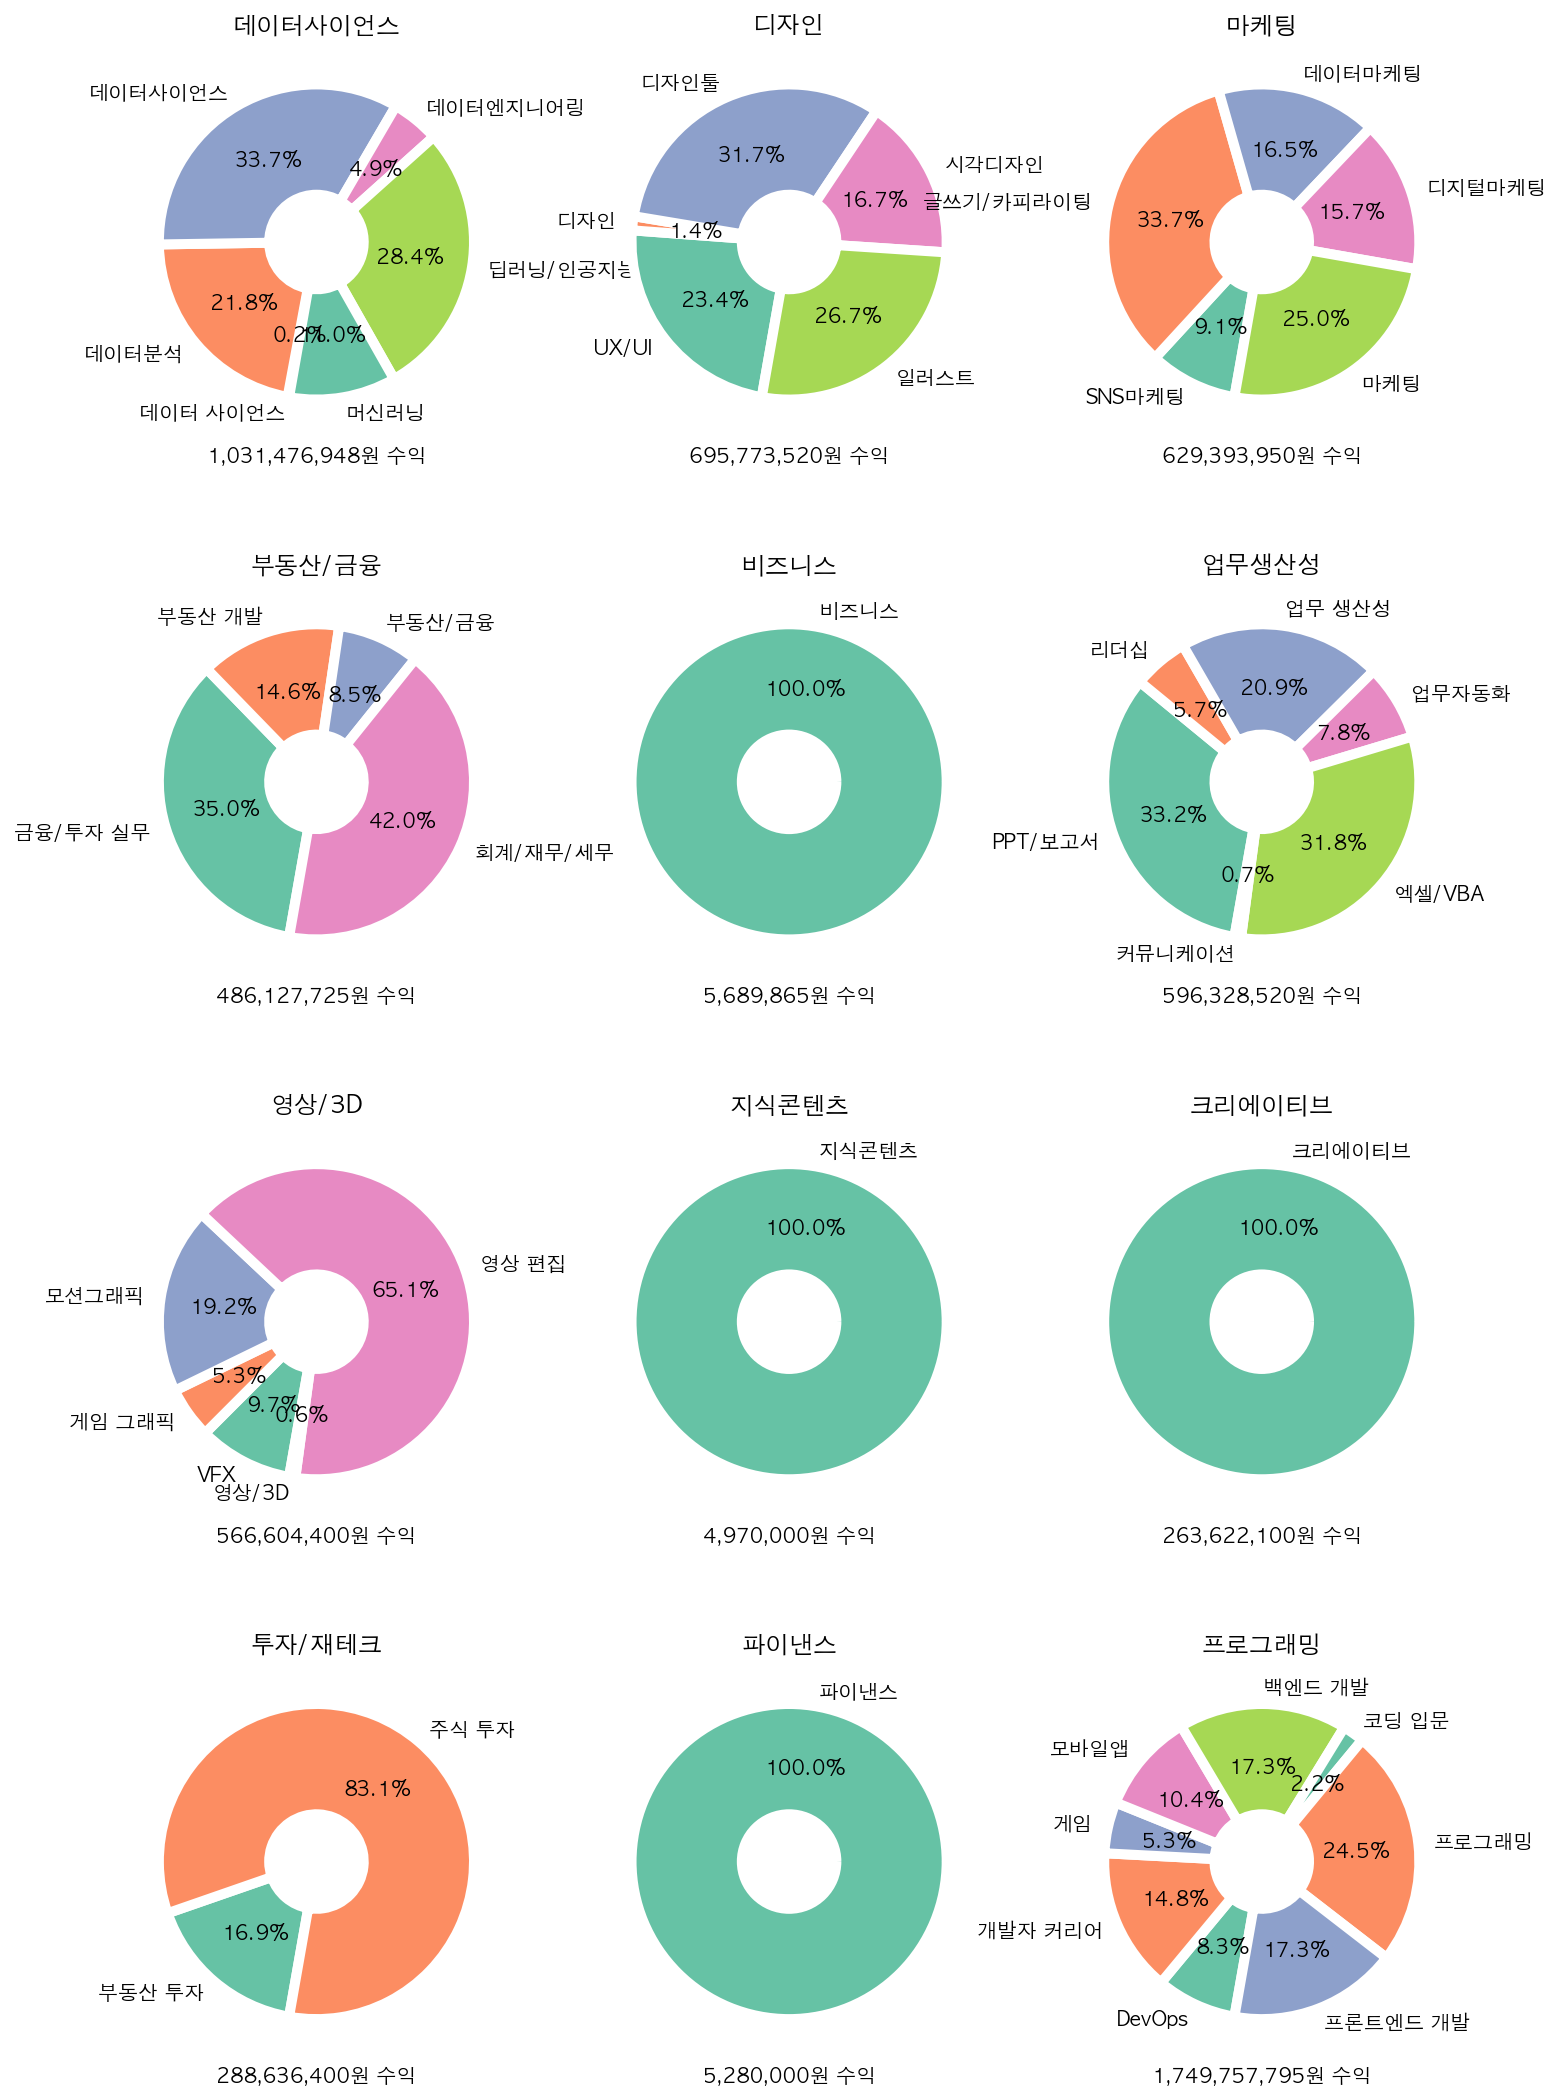

In [61]:
t = pd.pivot_table(data=pt, index = ['category_title','subcategory_title'], values=['transaction_amount'],  aggfunc = "sum").reset_index()
ct = list(t['category_title'].unique())
plt.figure(figsize=(12,24))
colors = sns.color_palette('Set2')[0:5]

for i, title in enumerate(ct):
    plt.subplot(5, 3, i+1)
    plt.title(f"{title}")
    t1 = t[t['category_title']==title]
    plt.pie(t1['transaction_amount'], labels=t1['subcategory_title'], autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
    plt.xlabel(f"{t1['transaction_amount'].sum():,}원 수익")
plt.show()

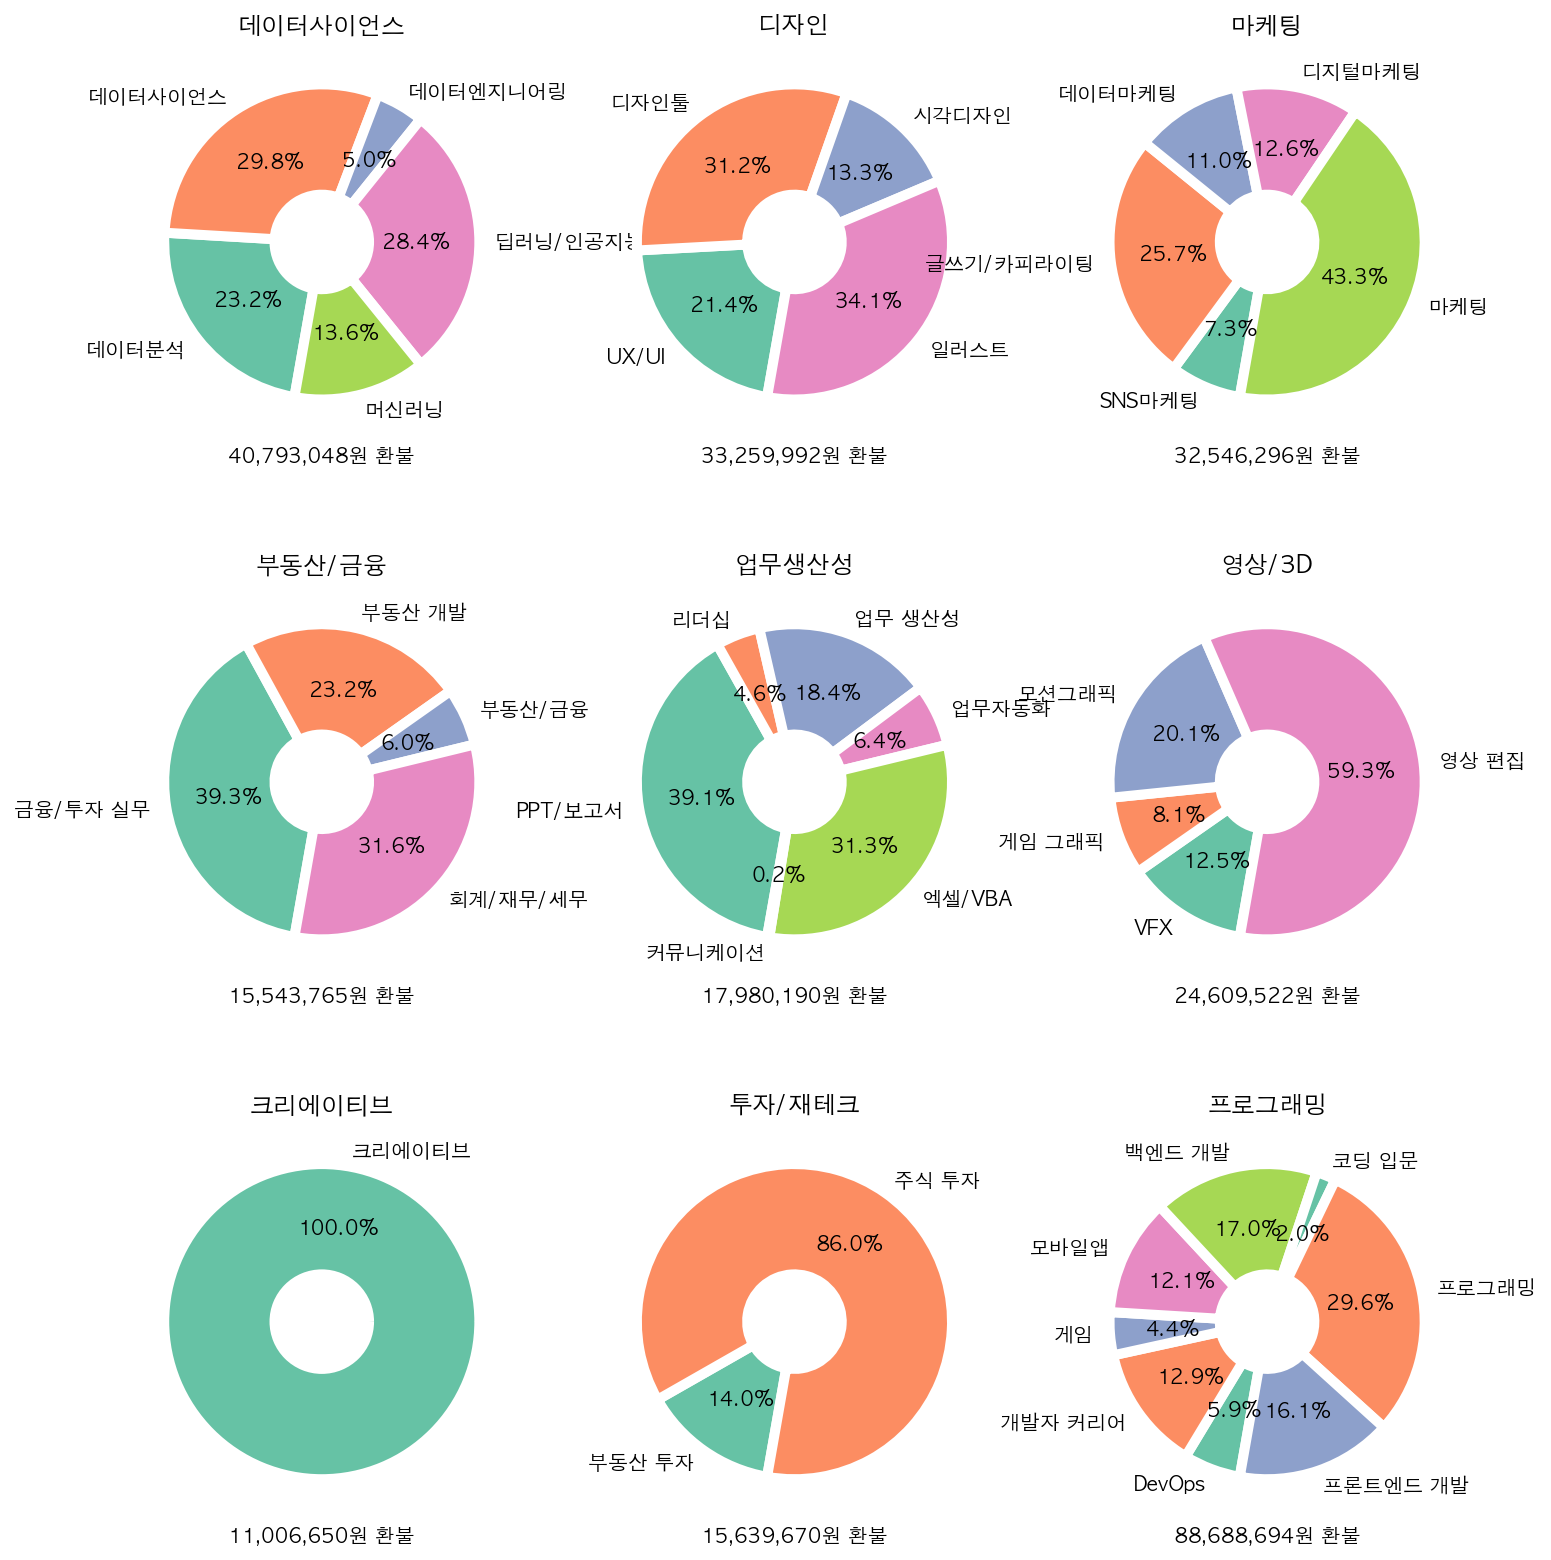

In [62]:
t = pd.pivot_table(data=rt, index = ['category_title','subcategory_title'], values=['transaction_amount'],  aggfunc = "sum").reset_index()
t['transaction_amount'] = t['transaction_amount'].apply(abs)
ct = list(t['category_title'].unique())
plt.figure(figsize=(12,24))
colors = sns.color_palette('Set2')[0:5]

for i, title in enumerate(ct):
    plt.subplot(5, 3, i+1)
    plt.title(f"{title}")
    t1 = t[t['category_title']==title]
    plt.pie(t1['transaction_amount'], labels=t1['subcategory_title'], autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
    plt.xlabel(f"{t1['transaction_amount'].sum():,}원 환불")
plt.show()

카테고리별 총 수입량과 서브카테고리 비율

In [63]:
df.groupby('course_title').agg({'customer_id': 'count'}).sort_values(by='customer_id', ascending=False).head(20)

,customer_id
course_title,
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,3256
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,2754
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,2538
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,2128
올인원 패키지 : star741의 캐주얼 일러스트 드로잉,1634
초격차 패키지 : 한번에 끝내는 디자인 툴,1600
초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin,1443
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential,1430
초격차 패키지 : 한 번에 끝내는 엑셀 실무,1406


카테고리 별로 몇 개나 팔렸는지 확인 필요

In [64]:
pt.groupby("customer_id").agg({"id": "count"}).sort_values(by="id", ascending=False)[:1000]

,id
customer_id,
98685,53
50769,39
1189,35
40783,34
276705,29
...,...
491404,3
277385,3
489964,3


In [65]:
pt[pt["customer_id"]==98685]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,purchased
5119,984635,98685,201998.0,PAYMENT,COMPLETED,올인원 패키지 : iOS 앱 개발,프로그래밍,올인원,2021-04-01 10:19:28,24800,수강생 50만명 돌파 기념 감사제 쿠폰,87200.0,112000.0,112000.0,NaN,CARD,모바일앱,2020-01-14 00:00:00,True
6337,988664,98685,204342.0,PAYMENT,COMPLETED,"올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기",마케팅,올인원,2021-04-03 00:08:50,55300,GA4 30% 할인쿠폰,23700.0,79000.0,79000.0,NaN,CARD,데이터마케팅,2021-04-02 00:00:00,True
6936,990338,98685,201798.0,PAYMENT,COMPLETED,올인원 패키지 : 브랜딩 2020,마케팅,올인원,2021-04-04 10:08:51,162100,NaN,NaN,162100.0,162100.0,NaN,CARD,SNS마케팅,2019-11-11 00:00:00,True
22011,1037244,98685,200399.0,PAYMENT,COMPLETED,올인원 패키지 : 리더를 위한 HR/인재경영,업무생산성,올인원,2021-04-28 21:10:57,0,4월 1+1 페이백 이벤트 쿠폰,162100.0,111000.0,111000.0,NaN,PROMOTION,리더십,2019-03-22 00:00:00,True
22012,1037248,98685,201849.0,PAYMENT,COMPLETED,올인원 패키지 : 그로스 마케팅,마케팅,올인원,2021-04-28 21:11:43,0,4월 1+1 페이백 이벤트 쿠폰,178000.0,123000.0,123000.0,NaN,PROMOTION,데이터마케팅,2019-11-25 00:00:00,True
22014,1037252,98685,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-04-28 21:12:57,153300,초격차 패키지 : 한번에 끝내는 3D 디자인툴 30% 할인 쿠폰,65700.0,219000.0,219000.0,INICIS,CARD,디자인툴,2021-04-23 00:00:00,True
23448,1041392,98685,204775.0,PAYMENT,COMPLETED,입만 열면 인정받는 스피치 10분컷,업무생산성,하루10분컷,2021-04-30 09:21:48,19500,NaN,NaN,19500.0,19500.0,INICIS,CARD,업무 생산성,2021-04-28 00:00:00,True
28280,1054819,98685,204773.0,PAYMENT,COMPLETED,이것만 배우면 끝 PPT 10분컷,업무생산성,하루10분컷,2021-05-06 09:33:53,19900,NaN,NaN,19900.0,19900.0,INICIS,CARD,업무 생산성,2021-04-28 00:00:00,True
33455,1069671,98685,204631.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,프로그래밍,올인원,2021-05-13 23:03:57,69000,[럭키룰렛] 올인원패키지,10000.0,79000.0,79000.0,INICIS,CARD,백엔드 개발,NaT,True
50612,1127326,98685,201520.0,PAYMENT,COMPLETED,올인원 패키지 : AWS/Docker 클라우드 서버 구축,프로그래밍,올인원,2021-06-08 11:12:38,32500,5월 페이백 프로모션 쿠폰,80000.0,112500.0,112500.0,INICIS,CARD,DevOps,NaT,True


## 시간대별 판매량

In [66]:
pt_h = df[(df['type']=='PAYMENT')&(df['state']=='COMPLETED')]
pt_h['completed_at'] = pt_h['completed_at'].dt.strftime("%Y-%m-%d-%H")

In [67]:
# def func1(x):
#     return x.strftime("%Y-%m-%d-%H")
# def func2(x):
#     return x.strftime("%Y-%m-%d")
# pt["completed_at"]=pt["completed_at"].apply(func1)


# pt['marketing_start_at'] = pt['marketing_start_at'].dt.strftime("%Y-%m-%d")
pt['completed_at'] = pt['completed_at'].dt.strftime("%Y-%m-%d")

### 21년7월 이전

<AxesSubplot:xlabel='completed_at', ylabel='count'>

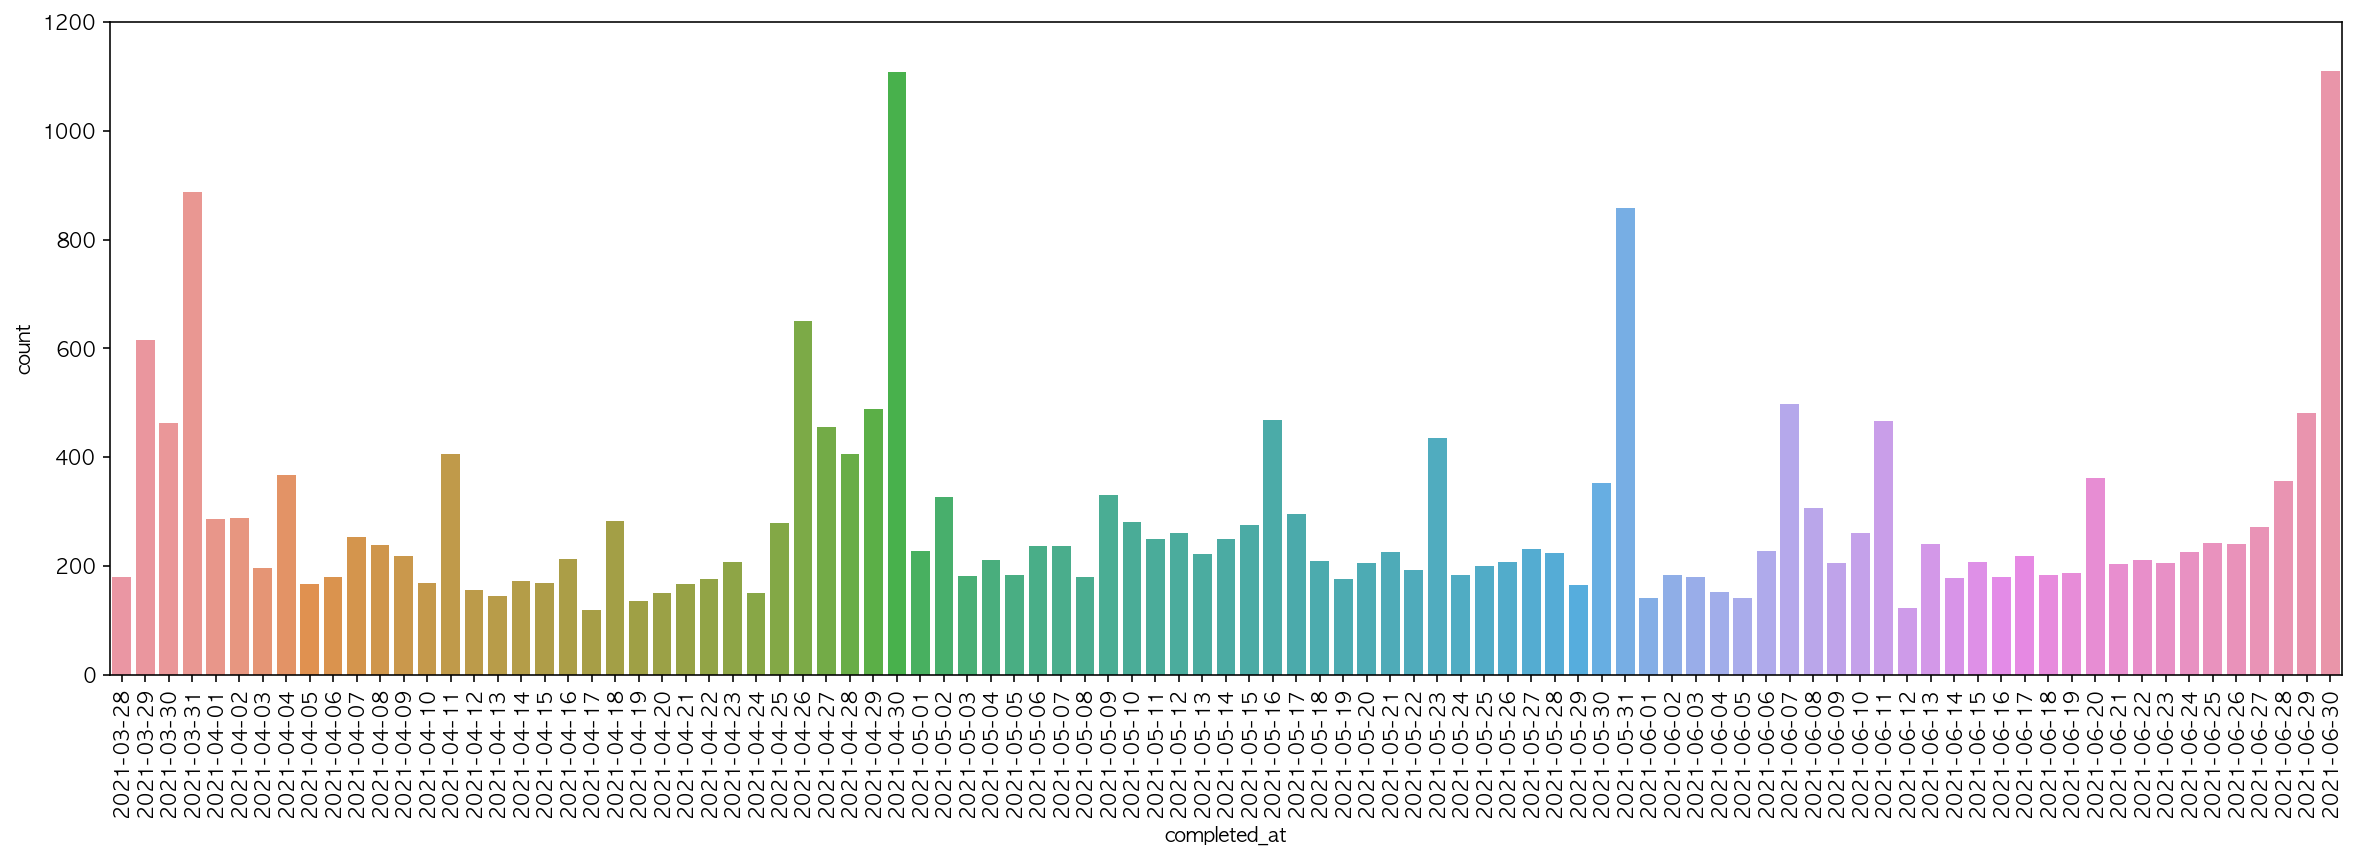

In [68]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.ylim([0,1200])
sns.countplot(data=pt[pt["completed_at"]<"2021-07-01"].sort_values(by="completed_at"), x="completed_at")

2021년 7월 이전 **총 판매량**

#### 쿠폰 거래 데이터

In [69]:
t = pt[~pt["coupon_title"].isnull()]

<AxesSubplot:xlabel='completed_at', ylabel='count'>

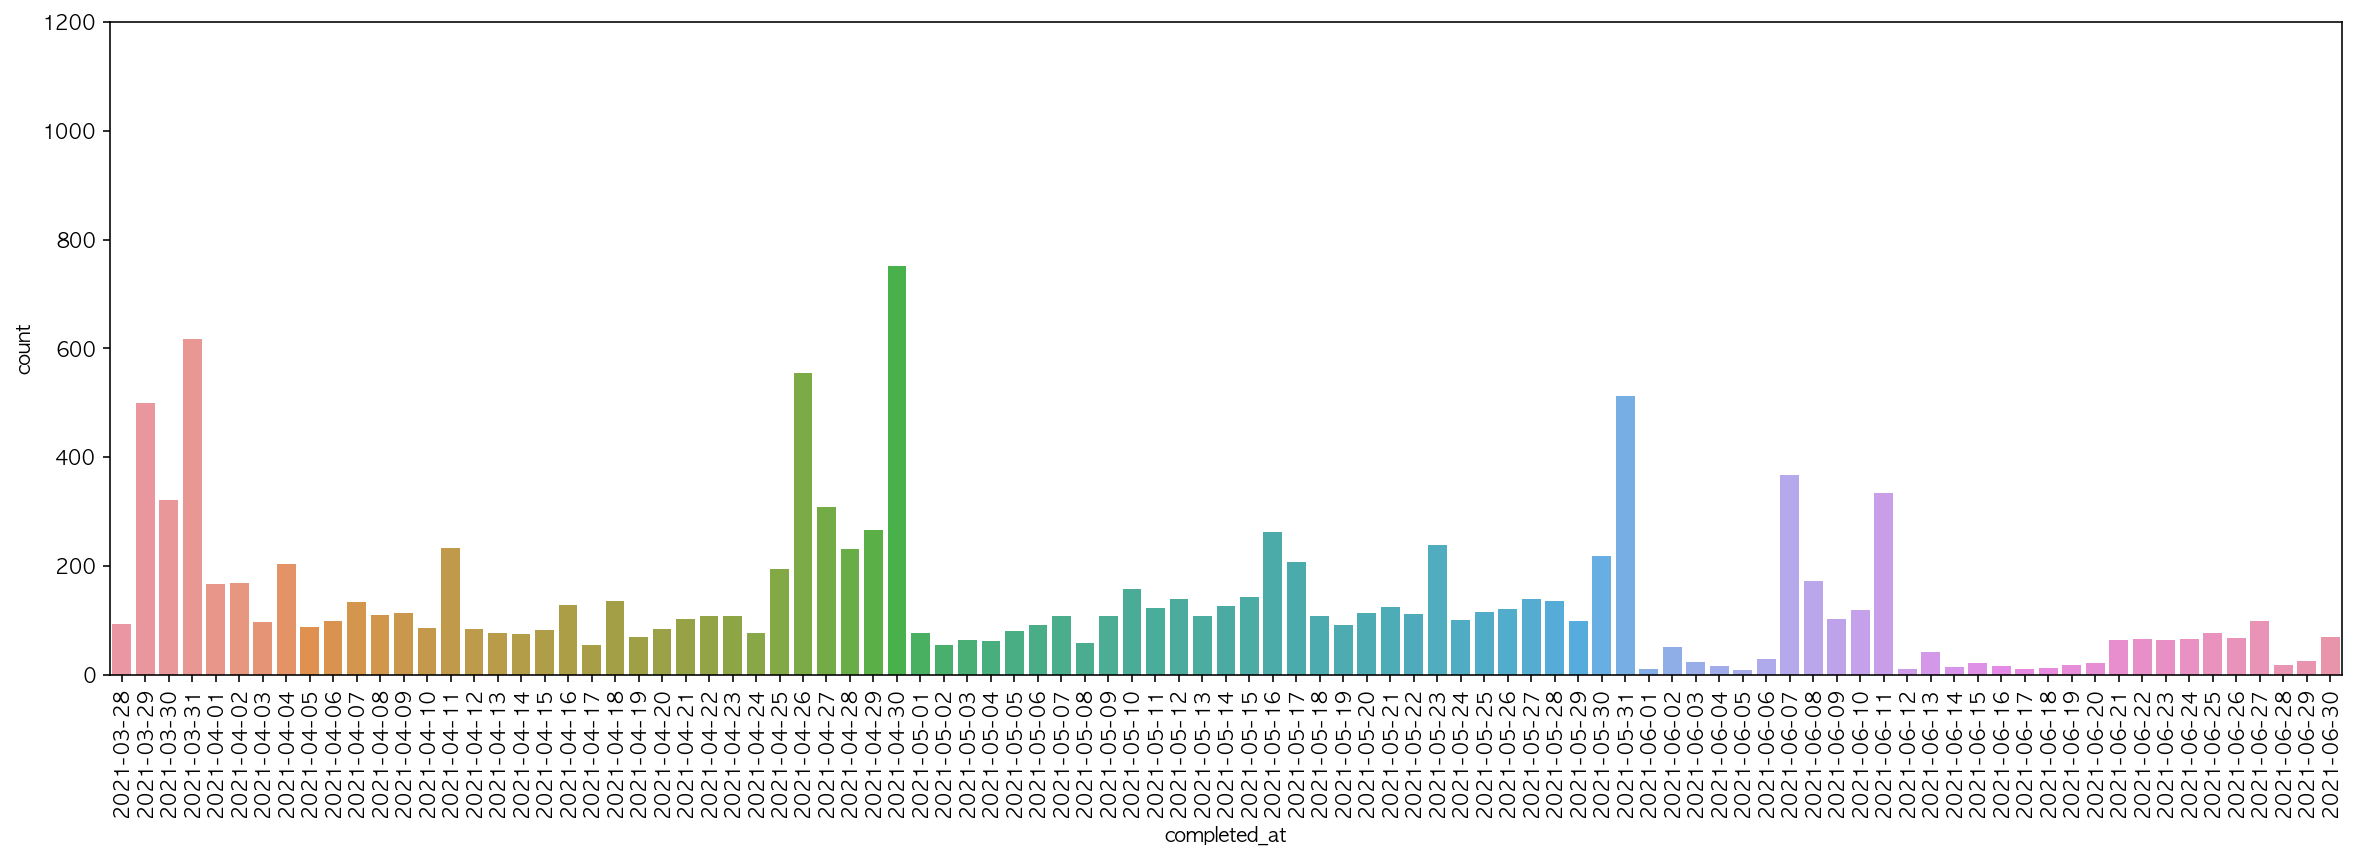

In [70]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.ylim([0,1200])
sns.countplot(data=t[t["completed_at"]<"2021-07-01"].sort_values(by="completed_at"), x="completed_at")

2021년 7월 이전 총 판매량 중 **쿠폰이 사용된 판매량**

### 21년7월 이후

<AxesSubplot:xlabel='completed_at', ylabel='count'>

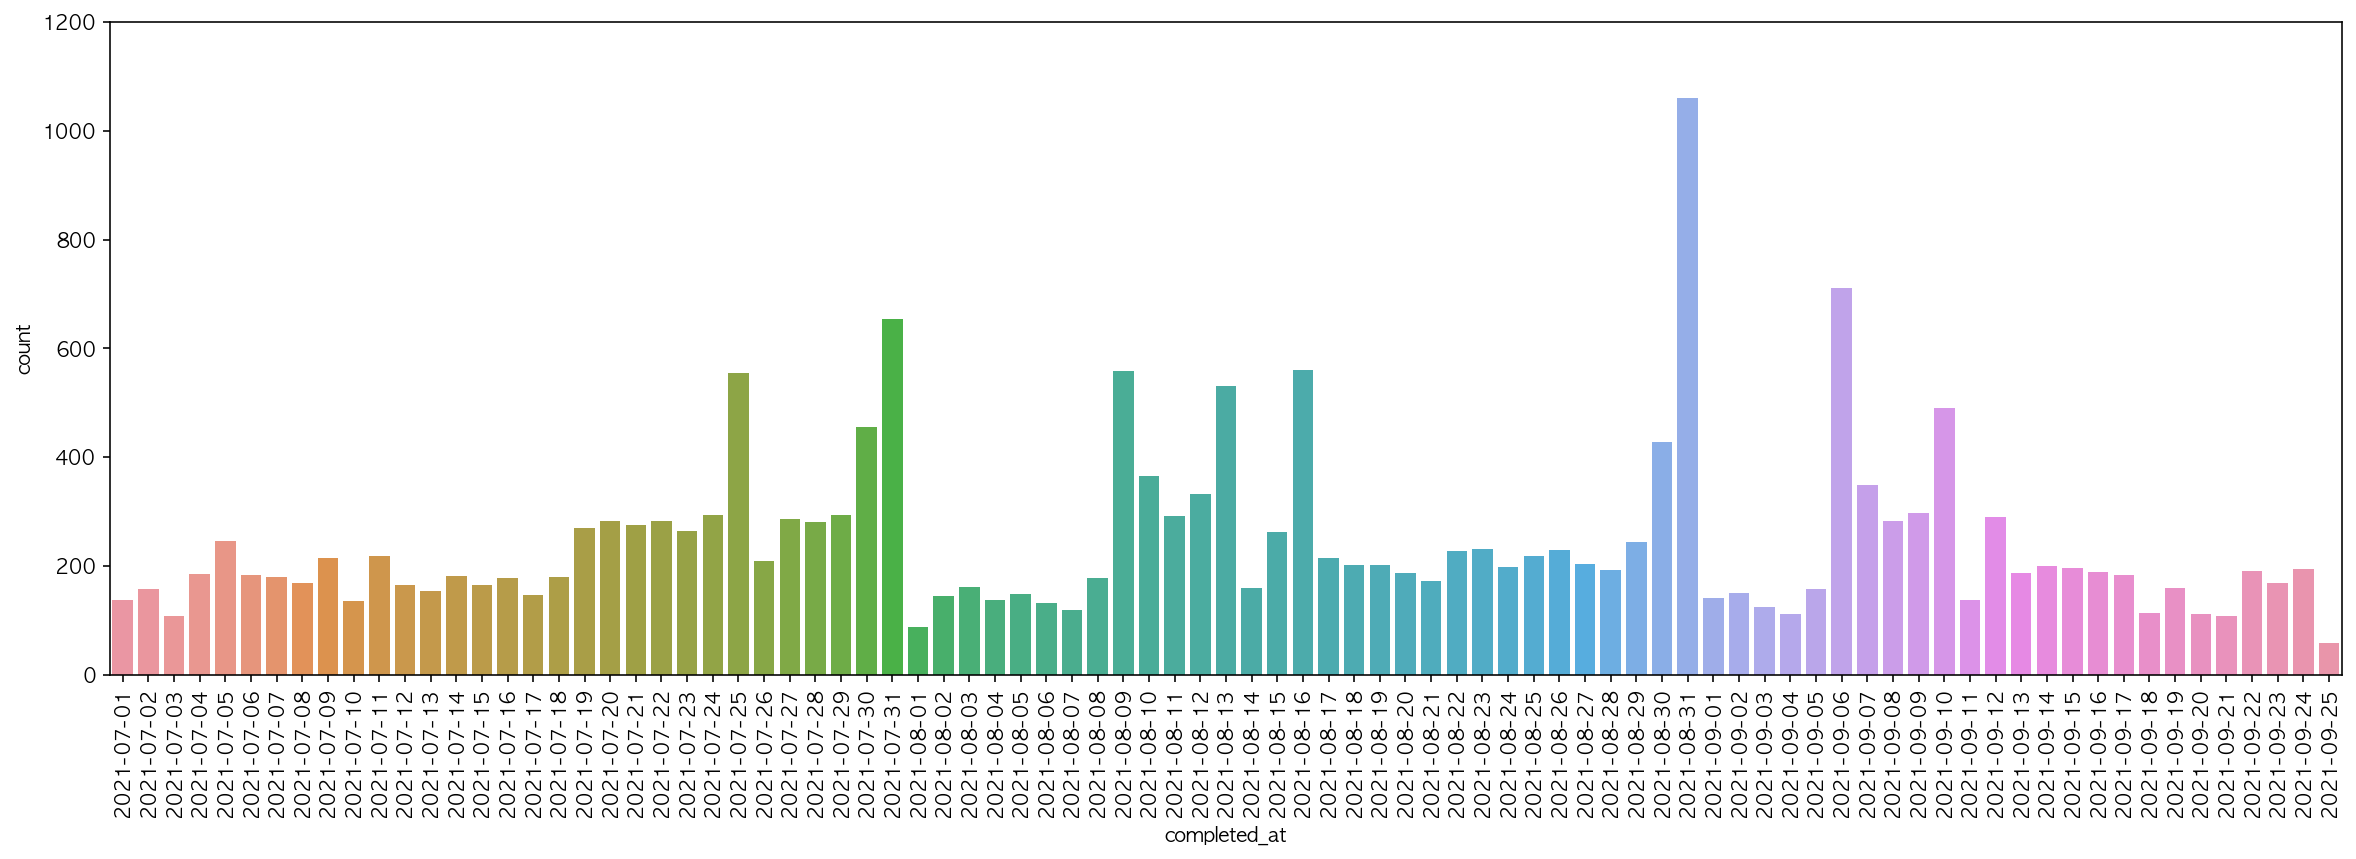

In [71]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.ylim([0,1200])
sns.countplot(data=pt[pt["completed_at"]>="2021-07-01"].sort_values(by="completed_at"), x="completed_at")

2021년 7월 이후 **총 판매량**

#### 쿠폰 거래 데이터

<AxesSubplot:xlabel='completed_at', ylabel='count'>

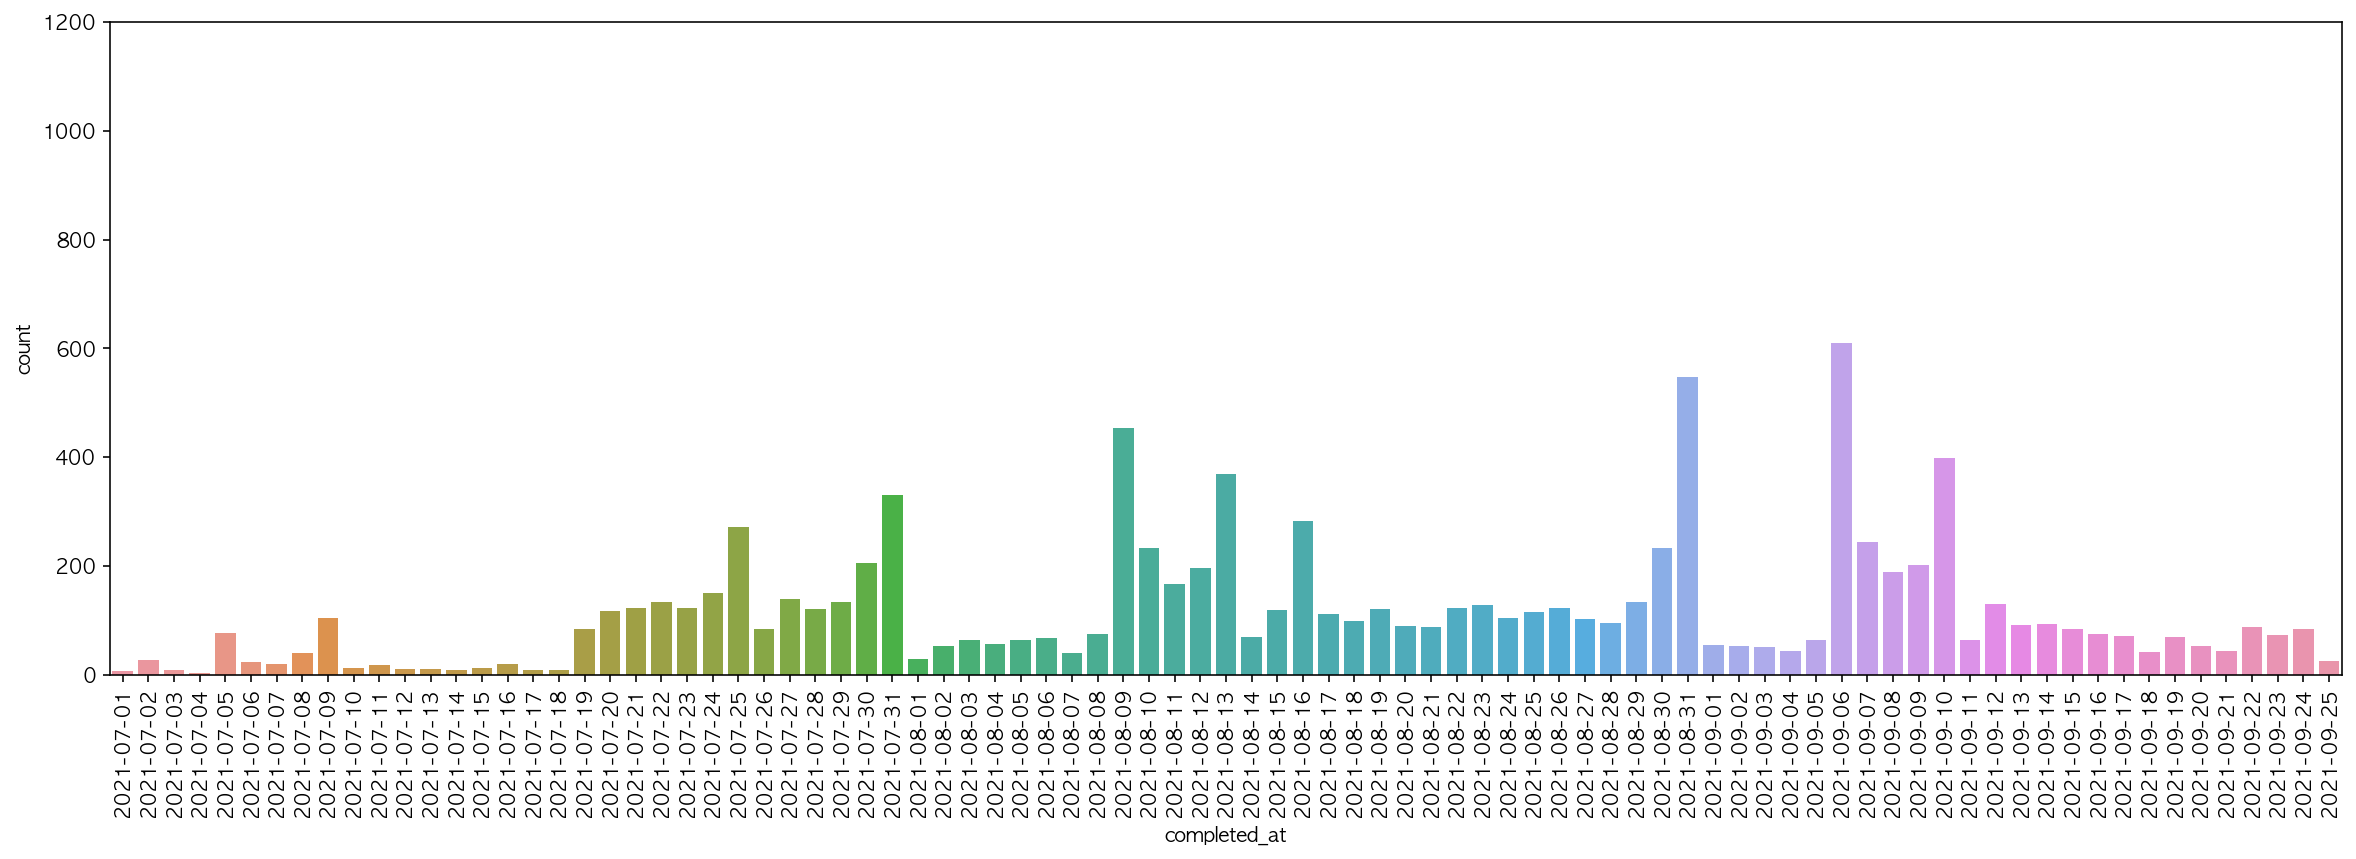

In [72]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.ylim([0,1200])
sns.countplot(data=t[t["completed_at"]>="2021-07-01"].sort_values(by="completed_at"), x="completed_at")

2021년 7월 이후 총 판매량 중 **쿠폰이 사용된 판매량**

총 거래량이 많은 날에 쿠폰을 사용한 거래량도 많다

### 월별 쿠폰

In [73]:
t = pt[~pt["coupon_title"].isnull()]

#### 전체 월별 쿠폰량 3~9월

In [98]:
def func(x):
    if "2021-03-01"<=x and x<"2021-04-01":
        return "3월"
    elif "2021-04-01"<=x and x<"2021-05-01":
        return "4월"
    elif "2021-05-01"<=x and x<"2021-06-01":
        return "5월"
    elif "2021-06-01"<=x and x<"2021-07-01":
        return "6월"
    elif "2021-07-01"<=x and x<"2021-08-01":
        return "7월"
    elif "2021-08-01"<=x and x<"2021-09-01":
        return "8월"
    elif "2021-09-01"<=x and x<"2021-10-01":
        return "9월"
    else:
        return "해당없음"

t["coupon_month"] = t['completed_at'].apply(func)

<AxesSubplot:xlabel='coupon_month', ylabel='count'>

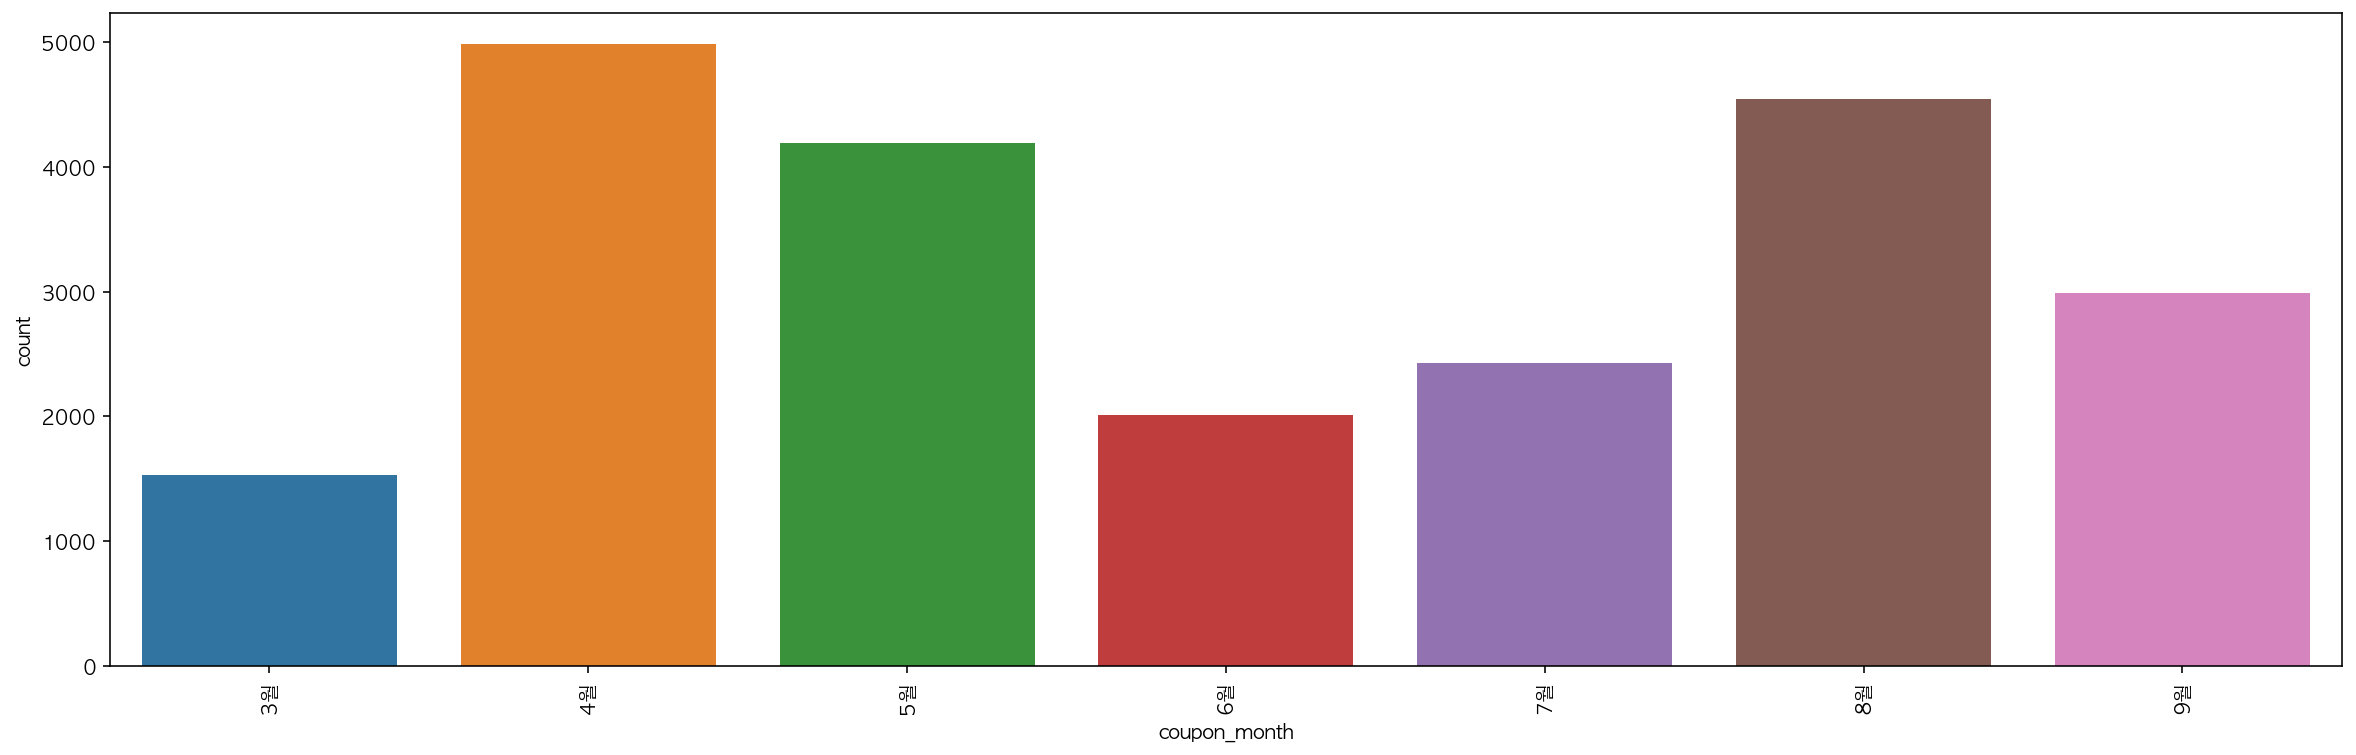

In [75]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(data=t.sort_values(by="completed_at"), x="coupon_month")

In [100]:
t[t["coupon_title"].str.startswith("6월")]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,purchased,coupon_month
68779,1194070,564375,205457.0,PAYMENT,COMPLETED,초격차 패키지 : 게임 캐릭터 모델링의 모든 것,영상/3D,올인원,2021-07-05,126000,6월 반값특가 프로모션 쿠폰,72000.0,198000.0,198000.0,INICIS,CARD,게임 그래픽,2021-06-29,True,7월
68780,1194075,112113,205925.0,PAYMENT,COMPLETED,[런칭프로모션_무료클립제공]초격차 패키지 : 한 번에 끝내는 React의 모든 것,프로그래밍,올인원,2021-07-05,101000,6월 반값특가 프로모션 쿠폰,88000.0,189000.0,189000.0,INICIS,CARD,프로그래밍,2021-06-25,True,7월
68784,1194089,33406,205879.0,PAYMENT,COMPLETED,올인원 패키지 : 누적 다운로드 120만+ 1인 개발자와 함께하는 앱 개발 입문,프로그래밍,올인원,2021-07-05,67000,6월 반값특가 프로모션 쿠폰,72000.0,139000.0,139000.0,PAYCO,CARD,모바일앱,2021-07-02,True,7월
68798,1194157,485464,204366.0,PAYMENT,COMPLETED,올인원 패키지 : 30개 글감으로 에세이 작가되기 BY.정영욱,마케팅,올인원,2021-07-05,47500,6월 반값특가 프로모션 쿠폰,54500.0,102000.0,102000.0,PAYCO,CARD,글쓰기/카피라이팅,2021-04-16,True,7월
68830,1194262,397572,204261.0,PAYMENT,COMPLETED,부동산 디벨로퍼 아카데미 : 부동산 마케팅,부동산/금융,올인원,2021-07-05,16000,6월 반값특가 프로모션 쿠폰,110000.0,126000.0,126000.0,INICIS,CARD,부동산 개발,2021-04-02,True,7월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71321,1207701,566689,204013.0,PAYMENT,COMPLETED,올인원 패키지 : 완전정복 시각디자인 기초,디자인,올인원,2021-07-09,88500,6월 반값특가 프로모션 쿠폰,84500.0,173000.0,173000.0,INICIS,CARD,시각디자인,2021-03-16,True,7월
71322,1207696,566670,203498.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 엑셀 실무,업무생산성,올인원,2021-07-09,22000,6월 반값특가 프로모션 쿠폰,88000.0,110000.0,110000.0,INICIS,VBANK,엑셀/VBA,2020-12-18,True,7월
71324,1207710,559157,203534.0,PAYMENT,COMPLETED,올인원 패키지 : 엑셀언니의 사무실용 엑셀뿌수기,업무생산성,올인원,2021-07-09,27200,6월 반값특가 프로모션 쿠폰,63800.0,91000.0,91000.0,INICIS,CARD,엑셀/VBA,2020-11-26,True,7월
71327,1207714,566563,202284.0,PAYMENT,COMPLETED,올인원 패키지 : 검색 최적화(SEO) 운영/전략,마케팅,올인원,2021-07-09,65200,6월 반값특가 프로모션 쿠폰,54800.0,120000.0,120000.0,INICIS,CARD,디지털마케팅,2020-02-26,True,7월


In [76]:
t[t["coupon_month"]=="6월"]['transaction_amount'].sum()

149316795

<AxesSubplot:xlabel='coupon_month', ylabel='transaction_amount'>

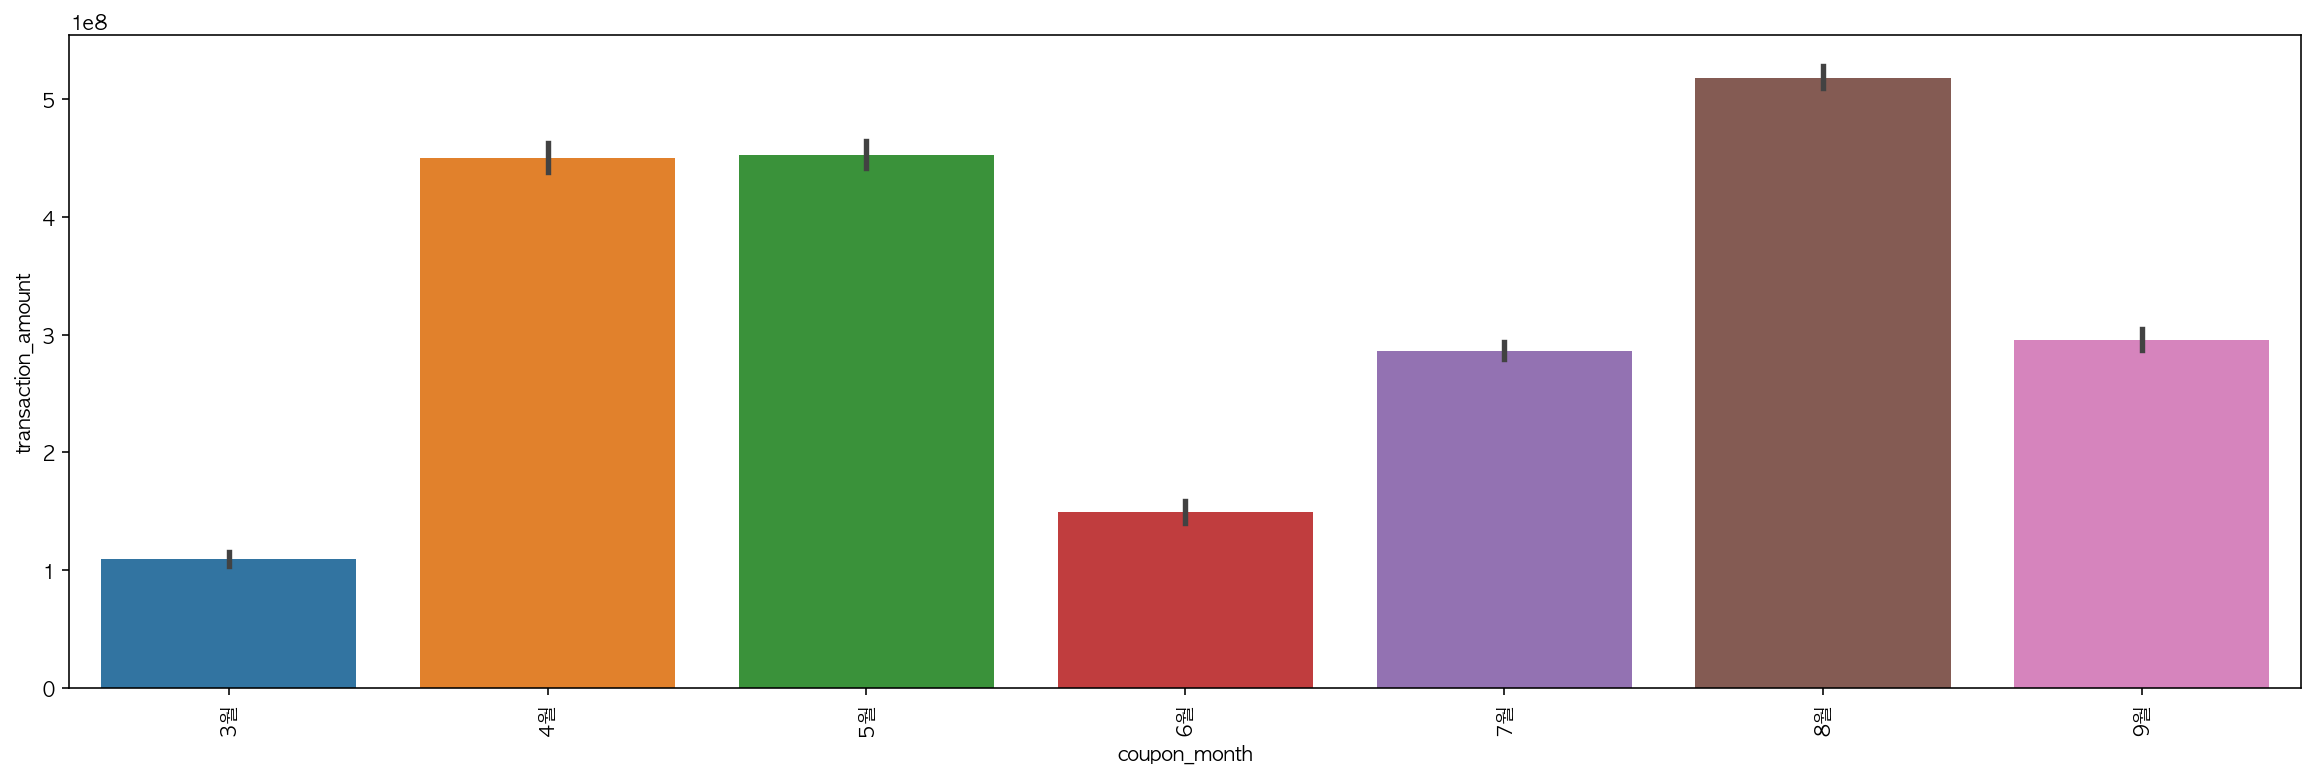

In [77]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(data=t[t["coupon_month"]!="해당없음"].sort_values(by="completed_at"), x="coupon_month", y="transaction_amount", estimator=sum)

#### 제목에 'x월'이 포함된 월별 쿠폰량

In [78]:
def func(x):
    if x.startswith("4월"):
        return "4월"
    elif x.startswith("5월"):
        return "5월"
    elif x.startswith("6월"):
        return "6월"
    elif x.startswith("7월"):
        return "7월"
    elif x.startswith("8월"):
        return "8월"
    else:
        return "해당없음"

t["coupon_month"] = t['coupon_title'].apply(func)

<AxesSubplot:xlabel='coupon_month', ylabel='count'>

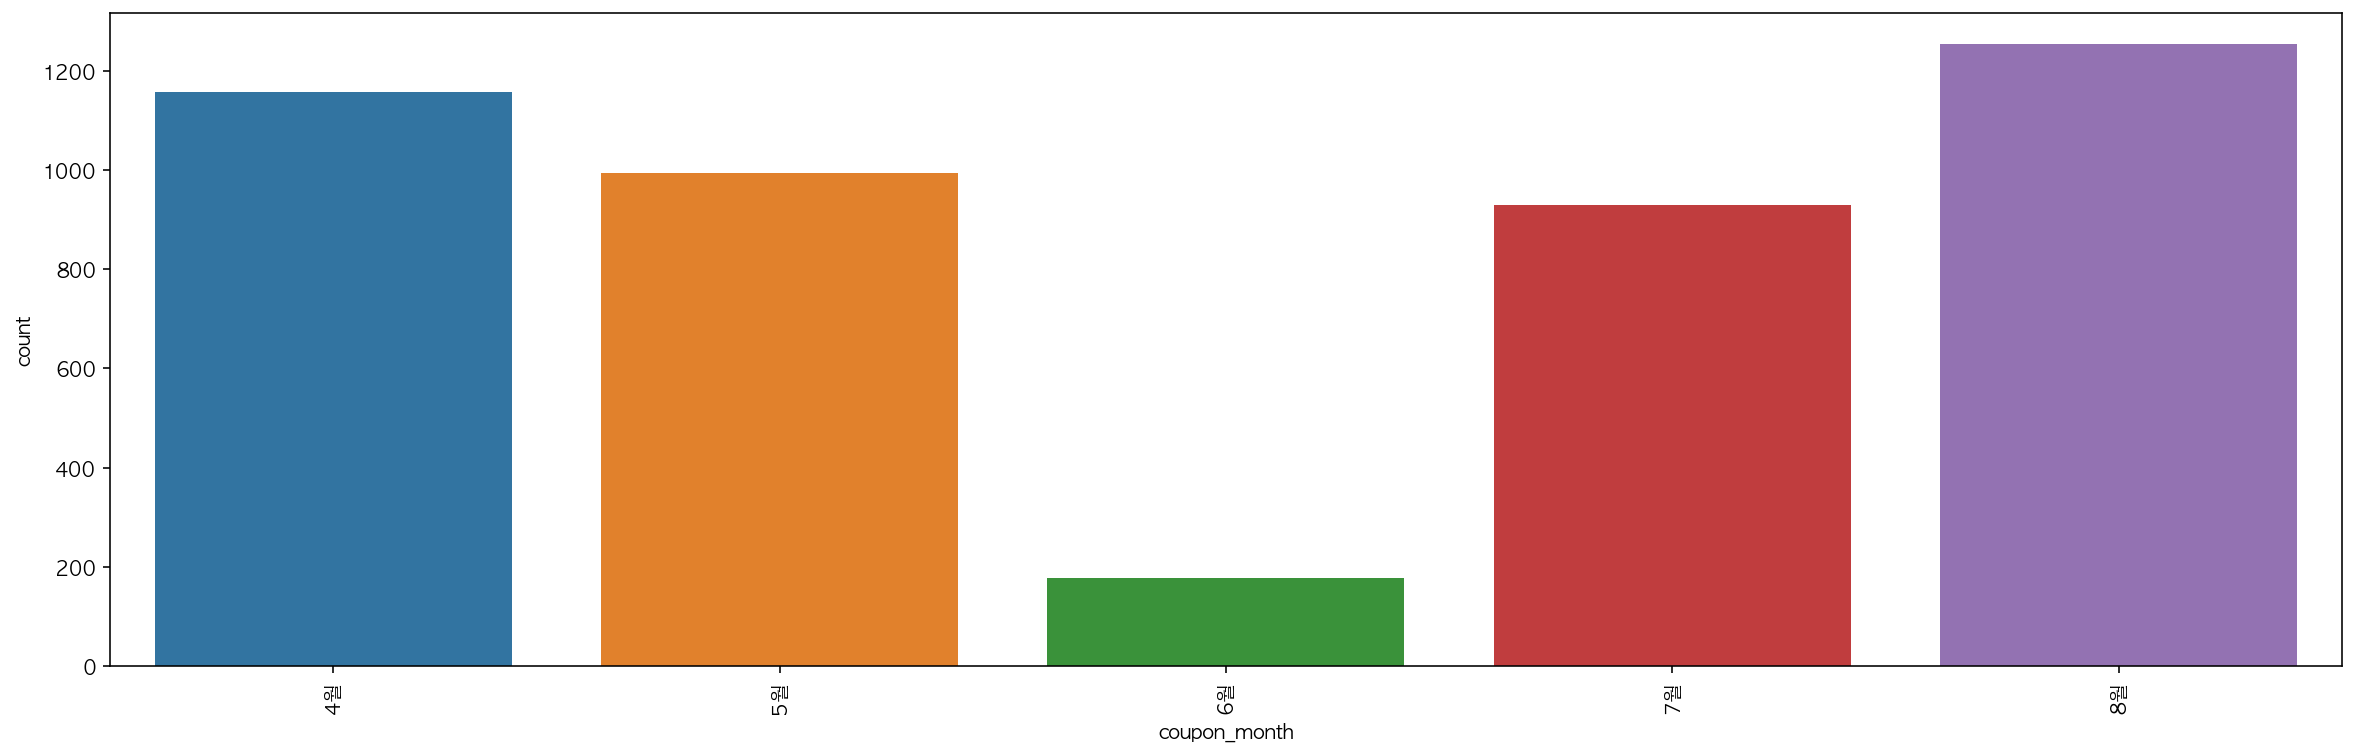

In [79]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(data=t[t["coupon_month"]!="해당없음"].sort_values(by="completed_at"), x="coupon_month")

<AxesSubplot:xlabel='coupon_month', ylabel='transaction_amount'>

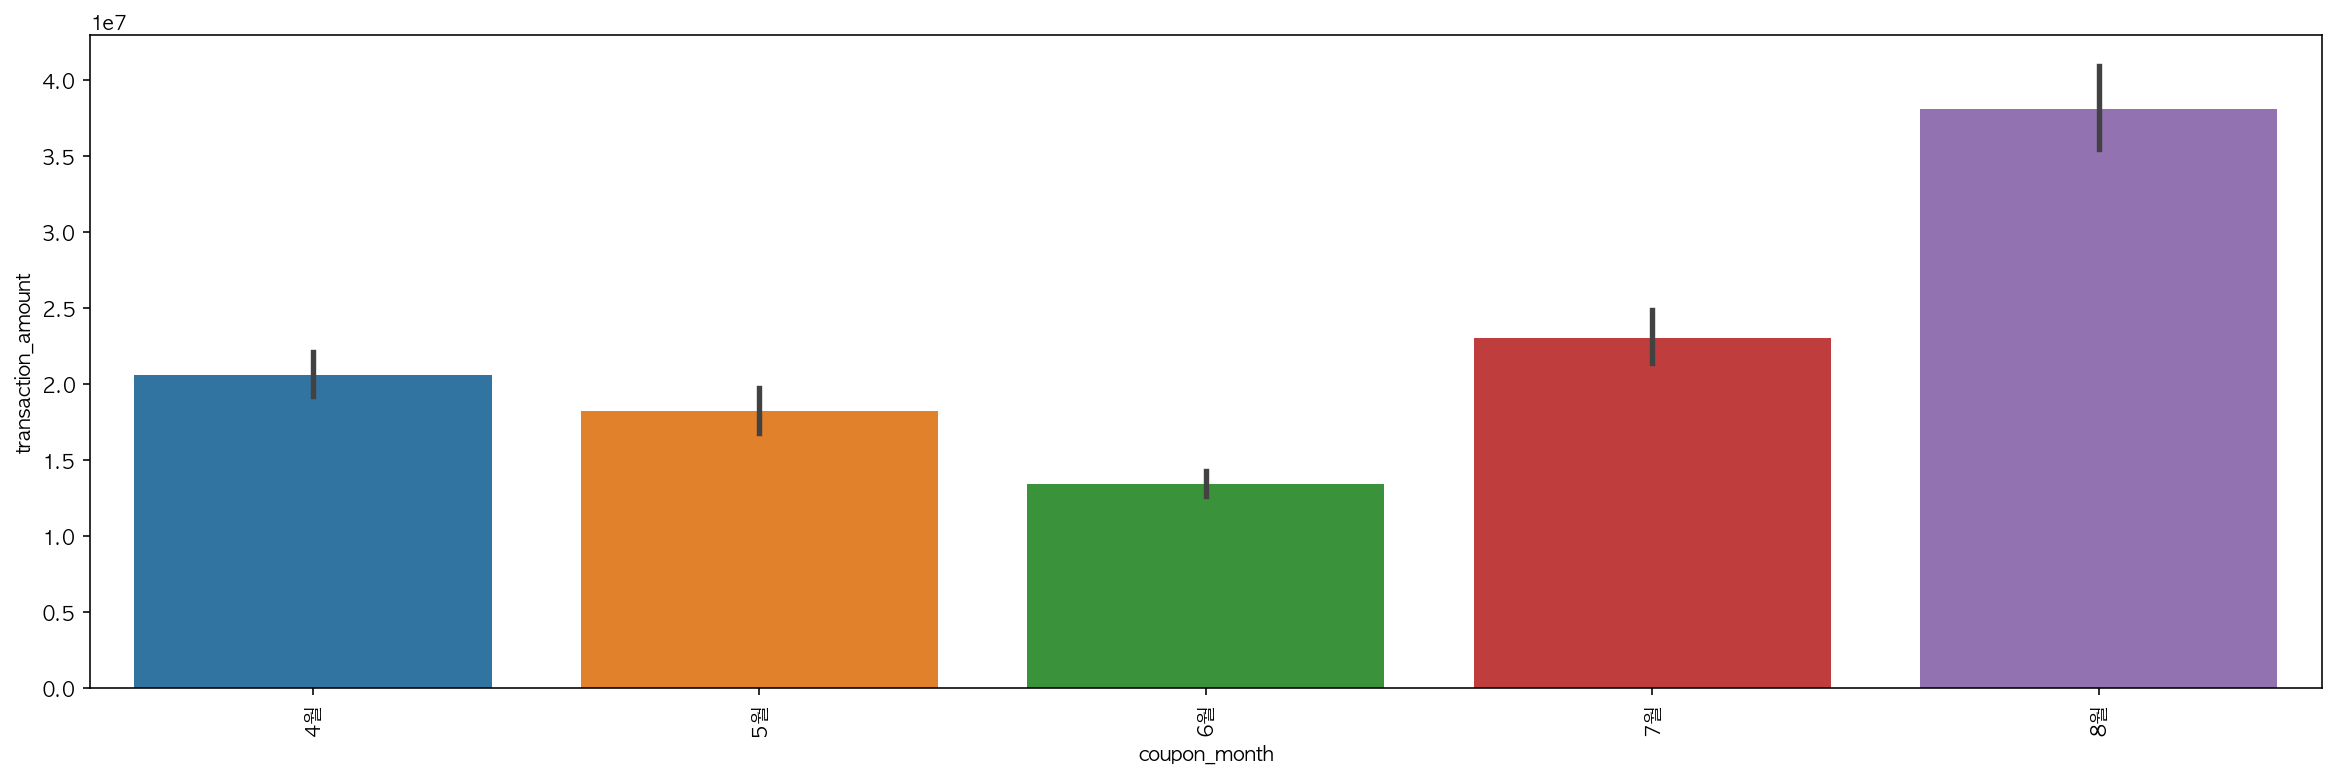

In [80]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(data=t[t["coupon_month"]!="해당없음"].sort_values(by="completed_at"), x="coupon_month", y="transaction_amount", estimator=sum)

* 6월 쿠폰을 사용한 거래데이터 2007개 중에 178개밖에 쿠폰명에 '6월'이 포함되어 있다
* '[6월 반값할인 이벤트]'이런 쿠폰을 별로 안뿌렸나 보다
* 그런데 4, 5, 6월하고 거래량 차이는 5배이상 나는데 실제 수익량 차이가 별로 없다
* 6월에는 무료 쿠폰을 별로 안뿌렸나 보다

In [81]:
s = t[t["coupon_month"]=="4월"]
s[s['transaction_amount']==0]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,purchased,coupon_month
18825,1028831,486991,202589.0,PAYMENT,COMPLETED,합격 패스 : ADsP,데이터사이언스,올인원,2021-04-26,0,4월 1+1 페이백 이벤트 쿠폰,114000.0,59000.0,59000.0,NaN,PROMOTION,데이터사이언스,2020-06-19,True,4월
18833,1028854,490561,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무생산성,올인원,2021-04-26,0,4월 1+1 페이백 이벤트 쿠폰,136000.0,119500.0,119500.0,NaN,PROMOTION,PPT/보고서,2019-11-14,True,4월
18835,1028857,407088,202516.0,PAYMENT,COMPLETED,올인원 패키지 : 유니티 포트폴리오 완성,프로그래밍,올인원,2021-04-26,0,4월 1+1 페이백 이벤트 쿠폰,161500.0,140500.0,140500.0,NaN,PROMOTION,게임,2020-04-03,True,4월
18849,1028898,50749,202712.0,PAYMENT,COMPLETED,올인원 패키지 : 통계와 엑셀을 활용한 데이터 분석,업무생산성,올인원,2021-04-26,0,4월 1+1 페이백 이벤트 쿠폰,190000.0,140500.0,140500.0,NaN,PROMOTION,엑셀/VBA,2020-06-17,True,4월
18851,1028902,26239,202072.0,PAYMENT,COMPLETED,올인원 패키지 : 코딩 첫 걸음 프로젝트,프로그래밍,올인원,2021-04-26,0,4월 1+1 페이백 이벤트 쿠폰,100000.0,97500.0,97500.0,NaN,PROMOTION,코딩 입문,2020-01-23,True,4월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25423,1046460,463521,203529.0,PAYMENT,COMPLETED,올인원 패키지 : 6개월 치 업무를 하루 만에 끝내는 업무자동화,업무생산성,올인원,2021-04-30,0,4월 1+1 페이백 이벤트 쿠폰,147000.0,127000.0,127000.0,NaN,PROMOTION,업무자동화,2020-11-25,True,4월
25445,1046512,485814,200622.0,PAYMENT,COMPLETED,올인원 패키지 : 기업가치 평가와 M&A 전략 실무,부동산/금융,올인원,2021-04-30,0,4월 1+1 페이백 이벤트 쿠폰,127000.0,123000.0,123000.0,NaN,PROMOTION,금융/투자 실무,2019-05-02,True,4월
25446,1046514,162948,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-04-30,0,4월 1+1 페이백 이벤트 쿠폰,119000.0,118000.0,118000.0,NaN,PROMOTION,영상 편집,2020-12-02,True,4월
25457,1046533,184888,201997.0,PAYMENT,COMPLETED,올인원 패키지 : Android 앱 개발,프로그래밍,올인원,2021-04-30,0,4월 1+1 페이백 이벤트 쿠폰,106000.0,100000.0,100000.0,NaN,PROMOTION,모바일앱,2020-01-04,True,4월


In [82]:
s = t[t["coupon_month"]=="5월"]
s[s['transaction_amount']==0]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,purchased,coupon_month
49358,1123952,167556,202726.0,PAYMENT,COMPLETED,올인원 패키지 : 재무/세무 회계 실무 완성,부동산/금융,올인원,2021-06-07,0,5월 페이백 프로모션 쿠폰,191000.0,121000.0,121000.0,NaN,PROMOTION,회계/재무/세무,2020-06-18,True,5월
49359,1123953,286315,203498.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 엑셀 실무,업무생산성,올인원,2021-06-07,0,5월 페이백 프로모션 쿠폰,117300.0,109500.0,109500.0,NaN,PROMOTION,엑셀/VBA,2020-12-18,True,5월
49360,1123954,169479,203328.0,PAYMENT,COMPLETED,올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵,디자인,올인원,2021-06-07,0,5월 페이백 프로모션 쿠폰,113500.0,93600.0,93600.0,NaN,PROMOTION,디자인툴,2020-10-23,True,5월
49365,1123988,482138,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-06-07,0,5월 페이백 프로모션 쿠폰,129000.0,116000.0,116000.0,NaN,PROMOTION,프론트엔드 개발,2021-02-02,True,5월
49390,1124035,440315,201520.0,PAYMENT,COMPLETED,올인원 패키지 : AWS/Docker 클라우드 서버 구축,프로그래밍,올인원,2021-06-07,0,5월 페이백 프로모션 쿠폰,113500.0,112500.0,112500.0,NaN,PROMOTION,DevOps,NaT,True,5월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53192,1137301,525920,201582.0,PAYMENT,COMPLETED,올인원 패키지 : 컴퓨터 공학 전공 필수,프로그래밍,올인원,2021-06-11,0,5월 페이백 프로모션 쿠폰,138000.0,131500.0,131500.0,NaN,PROMOTION,개발자 커리어,2019-09-30,True,5월
53210,1137345,65935,203531.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 데이터 분석 툴,데이터사이언스,올인원,2021-06-11,0,5월 페이백 프로모션 쿠폰,109000.0,85000.0,85000.0,NaN,PROMOTION,데이터분석,2021-02-10,True,5월
53215,1137375,528237,203015.0,PAYMENT,COMPLETED,올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020,마케팅,올인원,2021-06-11,0,5월 페이백 프로모션 쿠폰,138000.0,113000.0,113000.0,NaN,PROMOTION,SNS마케팅,2020-07-09,True,5월
53223,1137396,539287,203531.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 데이터 분석 툴,데이터사이언스,올인원,2021-06-11,0,5월 페이백 프로모션 쿠폰,135600.0,85000.0,85000.0,NaN,PROMOTION,데이터분석,2021-02-10,True,5월


In [83]:
s = t[t["coupon_month"]=="6월"]
s[s['transaction_amount']==0]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,purchased,coupon_month
68905,1194537,561661,202132.0,PAYMENT,COMPLETED,커리어 가이드 : 마케터 편,마케팅,올인원,2021-07-05,0,6월 반값특가 프로모션 쿠폰,63000.0,55000.0,55000.0,NaN,PROMOTION,마케팅,2020-02-11,True,6월
70360,1203082,553430,202132.0,PAYMENT,COMPLETED,커리어 가이드 : 마케터 편,마케팅,올인원,2021-07-08,0,6월 반값특가 프로모션 쿠폰,61500.0,55000.0,55000.0,NaN,PROMOTION,마케팅,2020-02-11,True,6월


In [84]:
s = t[t["coupon_month"]=="7월"]
s[s['transaction_amount']==0]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,purchased,coupon_month
85362,1272220,117402,206717.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영,프로그래밍,올인원,2021-08-09,0,7월 100% 페이백 프로모션 쿠폰,169000.0,158000.0,158000.0,NaN,PROMOTION,DevOps,2021-07-28 00:00:00,True,7월
85365,1272225,177716,203776.0,PAYMENT,COMPLETED,올인원 패키지 : UX/UI 디자인 (2020),디자인,올인원,2021-08-09,0,7월 100% 페이백 프로모션 쿠폰,199000.0,191000.0,191000.0,NaN,PROMOTION,UX/UI,2020-12-04 00:00:00,True,7월
85368,1272247,602020,206717.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영,프로그래밍,올인원,2021-08-09,0,7월 100% 페이백 프로모션 쿠폰,249000.0,158000.0,158000.0,NaN,PROMOTION,DevOps,2021-07-28 00:00:00,True,7월
85381,1272319,601588,204097.0,PAYMENT,COMPLETED,올인원 패키지 : 13만 구독자 피피티프로젝트의 누구나 쉽게 배우는 시선강탈 피피티...,업무생산성,올인원,2021-08-09,0,7월 100% 페이백 프로모션 쿠폰,102000.0,102000.0,102000.0,NaN,PROMOTION,PPT/보고서,2021-05-04 00:00:00,True,7월
85383,1272321,601588,202523.0,PAYMENT,COMPLETED,올인원 패키지 : 사진 촬영 및 라이트룸 보정,디자인,올인원,2021-08-09,0,7월 100% 페이백 프로모션 쿠폰,133500.0,128000.0,128000.0,NaN,PROMOTION,디자인툴,2020-04-17 00:00:00,True,7월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88479,1285495,519606,202927.0,PAYMENT,COMPLETED,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,데이터사이언스,올인원,2021-08-13,0,7월 100% 페이백 프로모션 쿠폰,199000.0,162500.0,162500.0,NaN,PROMOTION,데이터분석,2020-07-31 00:00:00,True,7월
88481,1285506,30327,206419.0,PAYMENT,COMPLETED,"올인원 패키지 : 김기현의 BERT, GPT-3를 활용한 자연어처리",데이터사이언스,올인원,2021-08-13,0,7월 100% 페이백 프로모션 쿠폰,199000.0,198000.0,198000.0,NaN,PROMOTION,딥러닝/인공지능,NaT,True,7월
88502,1285566,600629,206257.0,PAYMENT,COMPLETED,초격차 패키지 : 게임 개발자 취업의 모든 것,프로그래밍,올인원,2021-08-13,0,7월 100% 페이백 프로모션 쿠폰,249000.0,229000.0,229000.0,NaN,PROMOTION,게임,2021-08-09 00:00:00,True,7월
88519,1285598,604025,203787.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 디자인 툴,디자인,올인원,2021-08-13,0,7월 100% 페이백 프로모션 쿠폰,191000.0,180000.0,180000.0,NaN,PROMOTION,디자인툴,2020-12-24 11:00:00,True,7월


In [85]:
s = t[t["coupon_month"]=="8월"]
s[s['transaction_amount']==0]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,purchased,coupon_month
98183,1329506,149009,205579.0,PAYMENT,COMPLETED,올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략,투자/재테크,올인원,2021-09-06,0,8월 1+1 프로모션 쿠폰,329000.0,329000.0,329000.0,NaN,PROMOTION,주식 투자,2021-07-13,True,8월
98184,1329507,509879,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-06,0,8월 1+1 프로모션 쿠폰,197000.0,149000.0,149000.0,NaN,PROMOTION,영상 편집,2020-12-02,True,8월
98199,1329552,569863,205648.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 금융ㆍ투자(IB) 실무,부동산/금융,올인원,2021-09-06,0,8월 1+1 프로모션 쿠폰,321000.0,299000.0,299000.0,NaN,PROMOTION,금융/투자 실무,2021-08-02,True,8월
98201,1329553,627182,204180.0,PAYMENT,COMPLETED,올인원 패키지 : 현직 Advisory에게 배우는 M&A 전략 및 PMI 실무,부동산/금융,올인원,2021-09-06,0,8월 1+1 프로모션 쿠폰,253000.0,208000.0,208000.0,NaN,PROMOTION,금융/투자 실무,NaT,True,8월
98202,1329560,58285,206212.0,PAYMENT,COMPLETED,올인원 패키지 : 스프링러너의 스프링 아카데미 : Spring을 활용한 유연한 백엔...,프로그래밍,올인원,2021-09-06,0,8월 1+1 프로모션 쿠폰,180000.0,159000.0,159000.0,NaN,PROMOTION,백엔드 개발,2021-07-26,True,8월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101176,1341168,598419,205949.0,PAYMENT,COMPLETED,초격차 패키지 : 30개 프로젝트로 배우는 iOS 앱 개발 with Swift,프로그래밍,올인원,2021-09-10,0,8월 1+1 프로모션 쿠폰,180000.0,171000.0,171000.0,NaN,PROMOTION,모바일앱,2021-07-09,True,8월
101180,1341172,99571,205548.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 데이터 분석,데이터사이언스,올인원,2021-09-10,0,8월 1+1 프로모션 쿠폰,149500.0,139000.0,139000.0,NaN,PROMOTION,데이터분석,2021-06-17,True,8월
101189,1341199,543560,206331.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능,데이터사이언스,올인원,2021-09-10,0,8월 1+1 프로모션 쿠폰,228500.0,211000.0,211000.0,NaN,PROMOTION,딥러닝/인공지능,2021-07-26,True,8월
101193,1341209,634715,204373.0,PAYMENT,COMPLETED,초격차 패키지 : 일잘러 필수 스킬 모음.zip,업무생산성,올인원,2021-09-10,0,8월 1+1 프로모션 쿠폰,139500.0,139000.0,139000.0,NaN,PROMOTION,PPT/보고서,2021-06-04,True,8월


* 월별 이벤트에서 페이백 이벤트가 6월에는 빠져있다

### 세부 시간대별 판매량

4~8월 마지막날에 판매량이 급상승하는 것을 확인해보니 이 때 어느 시간대가 가장 많이 판매되는지 확인

<AxesSubplot:xlabel='completed_at', ylabel='count'>

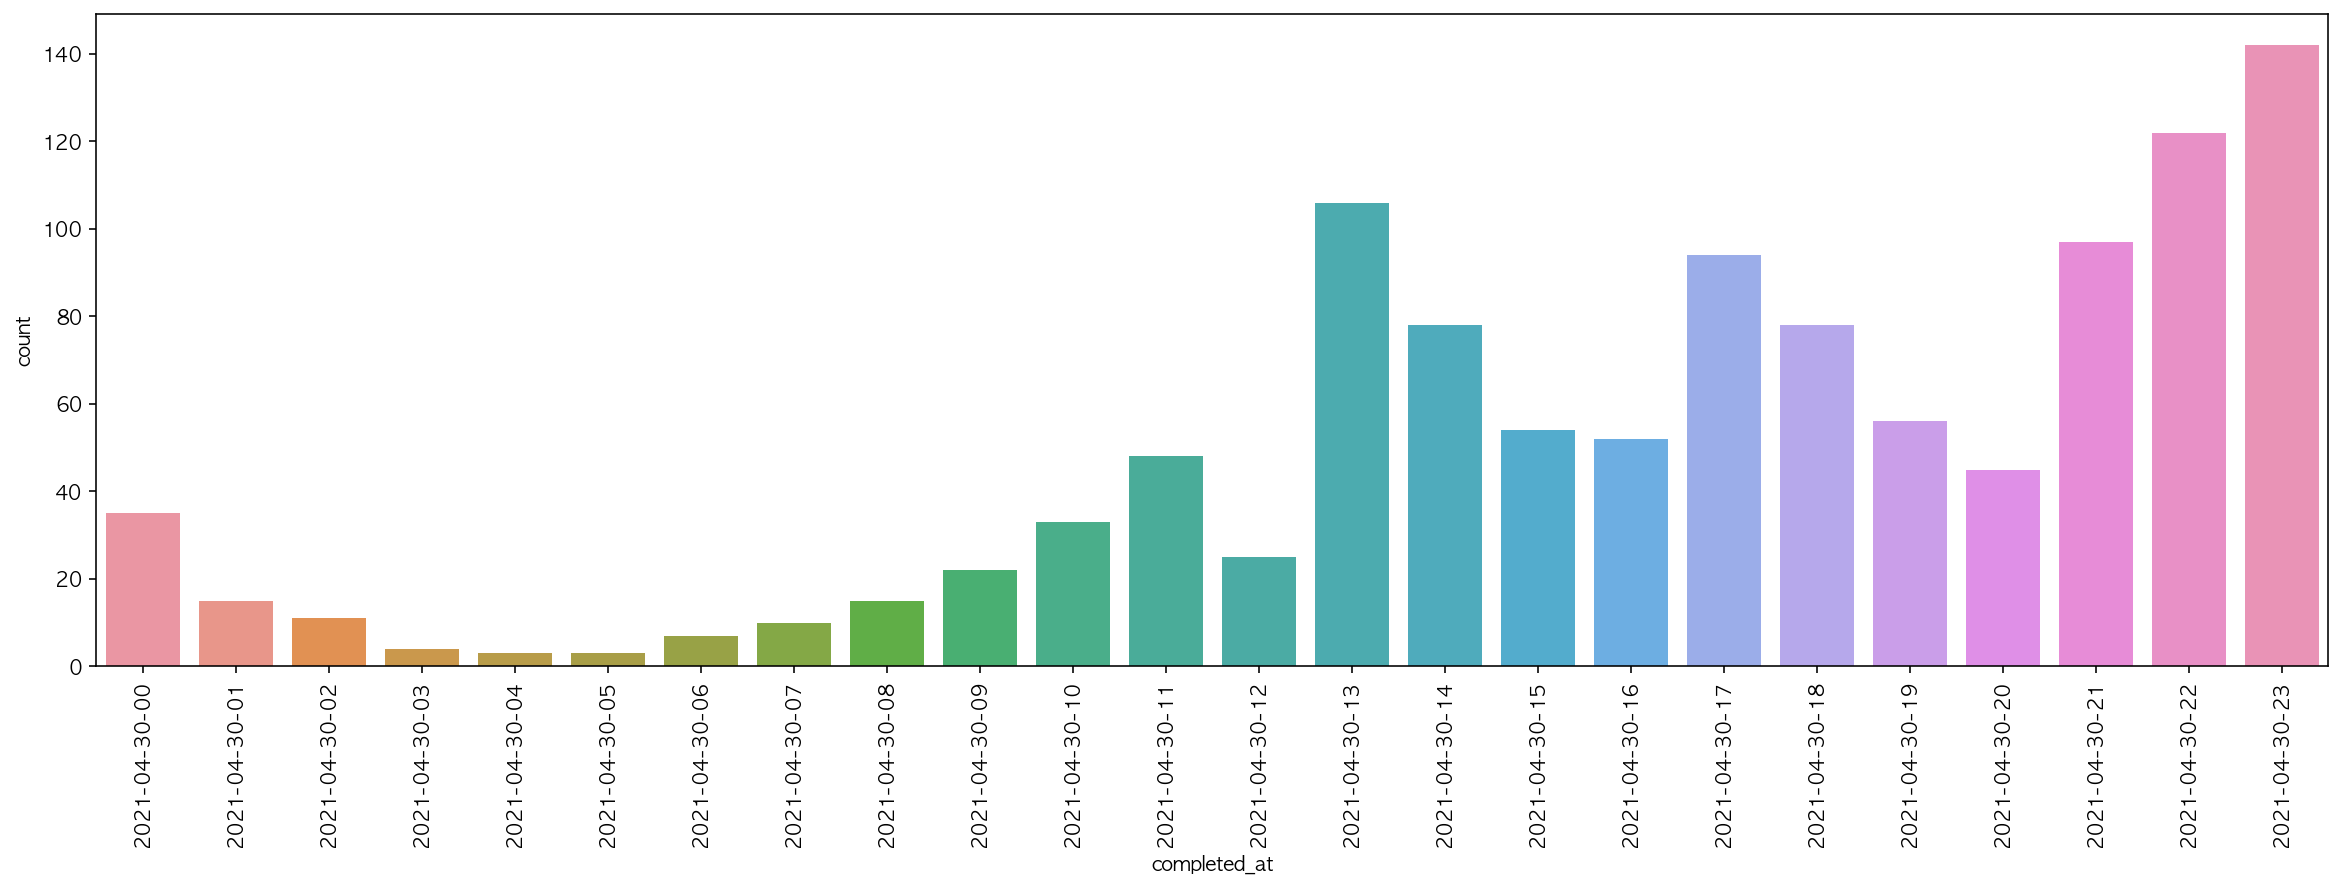

In [86]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(data=pt_h[(pt_h["completed_at"]>="2021-04-30-00")&(pt_h["completed_at"]<"2021-05-01-00")].sort_values(by="completed_at"), x="completed_at")

4월30일 밤10시 이후에 가장 많이 거래된다.

<AxesSubplot:xlabel='completed_at', ylabel='count'>

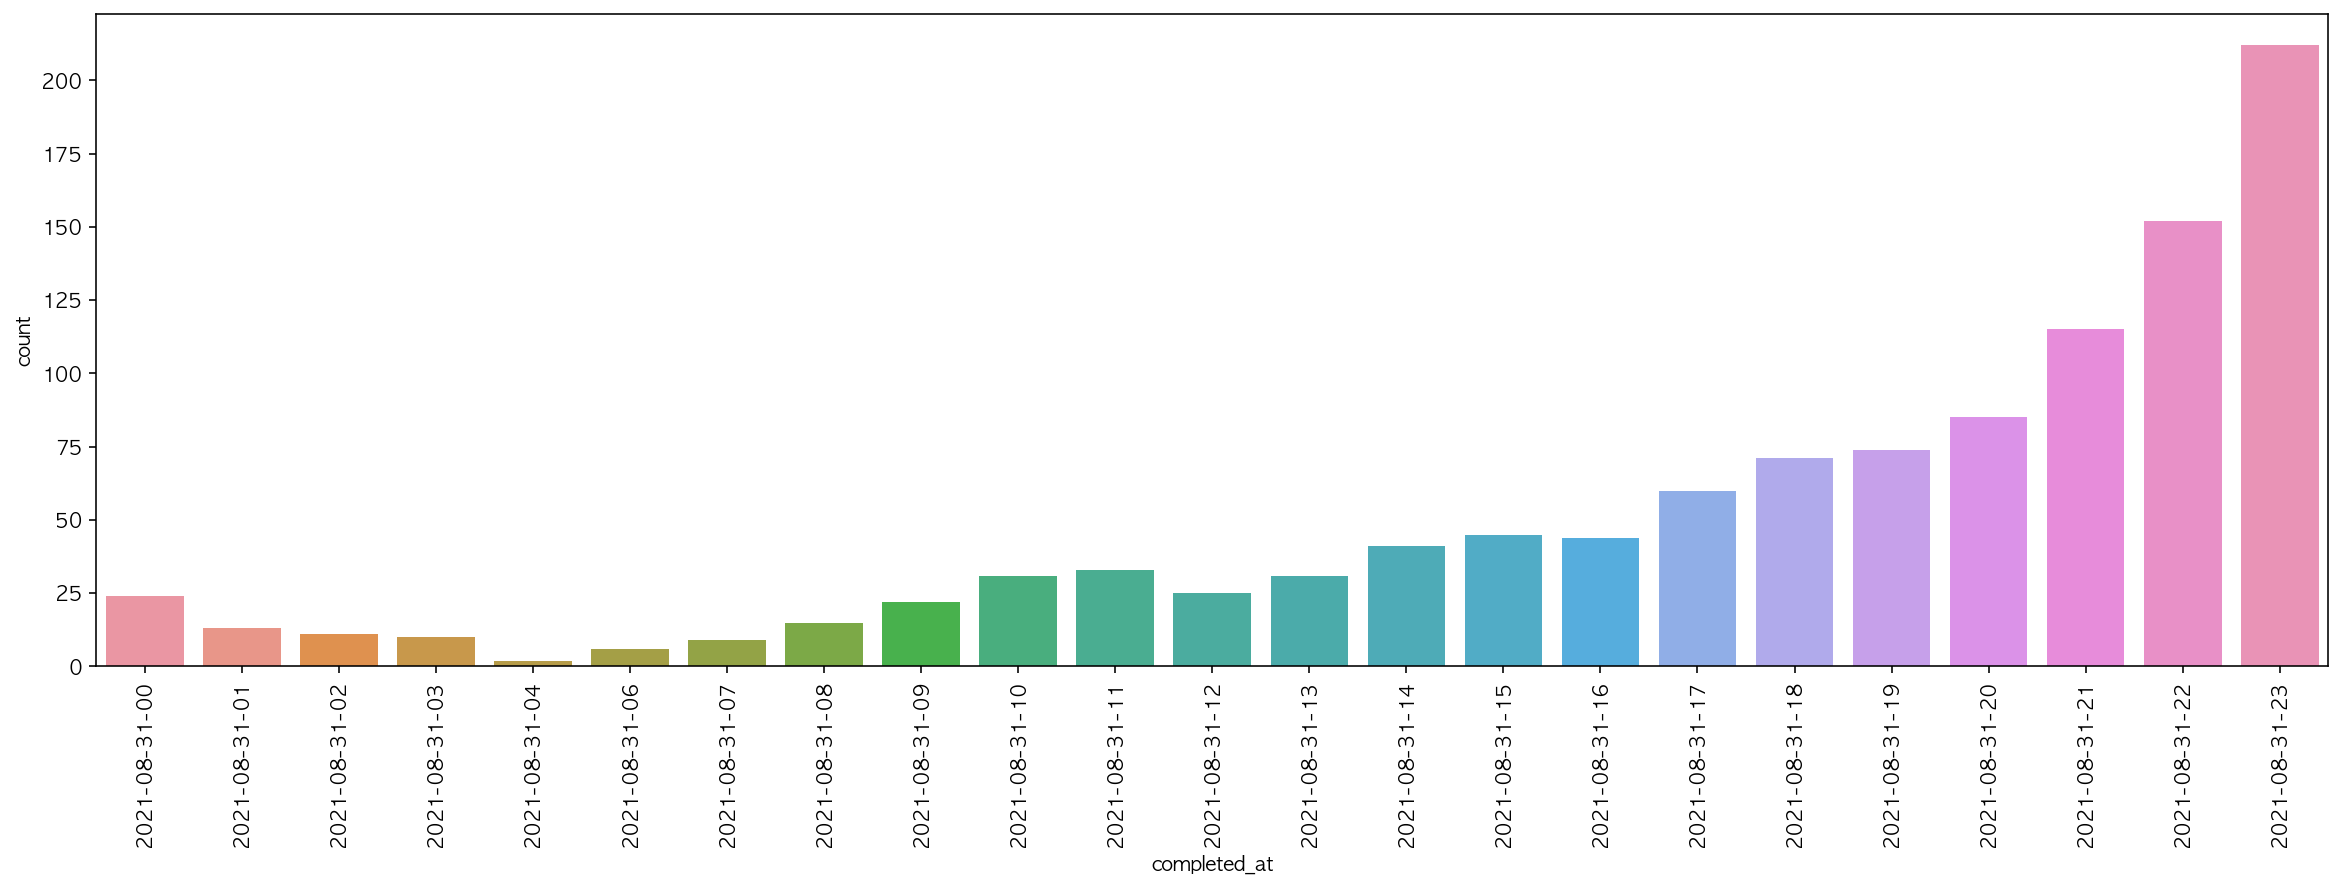

In [87]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(data=pt_h[(pt_h["completed_at"]>="2021-08-31-00")&(pt_h["completed_at"]<"2021-09-01-00")].sort_values(by="completed_at"), x="completed_at")

In [88]:
pt['type']

2         PAYMENT
4         PAYMENT
8         PAYMENT
10        PAYMENT
18        PAYMENT
           ...   
105411    PAYMENT
105412    PAYMENT
105413    PAYMENT
105416    PAYMENT
105418    PAYMENT
Name: type, Length: 48199, dtype: object

8월31일 밤10시 이후에 가장 많이 거래된다.

## 충성고객

In [219]:
pt["revenue"] = pt["coupon_title"].isnull() * pt["tax_free_amount"] + ~pt["coupon_title"].isnull() *pt["transaction_amount"]

- 쿠폰을 사용한 경우와 사용하지 않은 경우를 나누고, 사은품을 끼워서 판매한 강의도 나눔
- 사은품을 끼워 판 강의는 판매가격과 실제 수익이 다르다
- revenue에 실제 거래 가격을 넣어줌

In [220]:
t = pt.groupby("customer_id").agg({"revenue": "sum", "id": "count"})
t

,revenue,id
customer_id,,
46,540000.0,1
47,243500.0,2
79,0.0,1
96,289000.0,1
153,298000.0,2
...,...,...
670748,154000.0,1
670787,139000.0,1
670817,172000.0,1


In [221]:
t["revenue"].sort_values(ascending=False)[:len(t)//20]

customer_id
98685     7040750.0
50769     4979110.0
40783     4424095.0
20784     3445050.0
72501     3327550.0
            ...    
637162     439000.0
20458      439000.0
36289      438500.0
586419     438500.0
597498     438000.0
Name: revenue, Length: 1816, dtype: float64

- 실제 수익에서 상위 5퍼의 마지막 value를 찾음

In [223]:
t2 = t[(t["revenue"]>=500000)].sort_values(by=["revenue", "id"], ascending=False)
t2

,revenue,id
customer_id,,
98685,7040750.0,53
50769,4979110.0,39
40783,4424095.0,34
20784,3445050.0,26
72501,3327550.0,21
...,...,...
121701,500000.0,2
666982,500000.0,2
27867,500000.0,1


- 50만원을 기준으로 vip를 나누어 주기로 결정

In [240]:
print(f"상위 {round((len(t2)/len(t))*100, 2)}%")

상위 3.6%


- **50만원을 기준으로 나누었을 때, 전체 고객 중 vip 고객의 비율이 3.6%이다**

In [187]:
## 확인용
# pt[pt["customer_id"].isin(t2.index)]

In [225]:
def func(x):
    if x in t2.index:
        return True
    else:
        return False

pt['vip'] = pt["customer_id"].apply(func)

- vip 고객 여부 새로운 vip 컬럼 추가

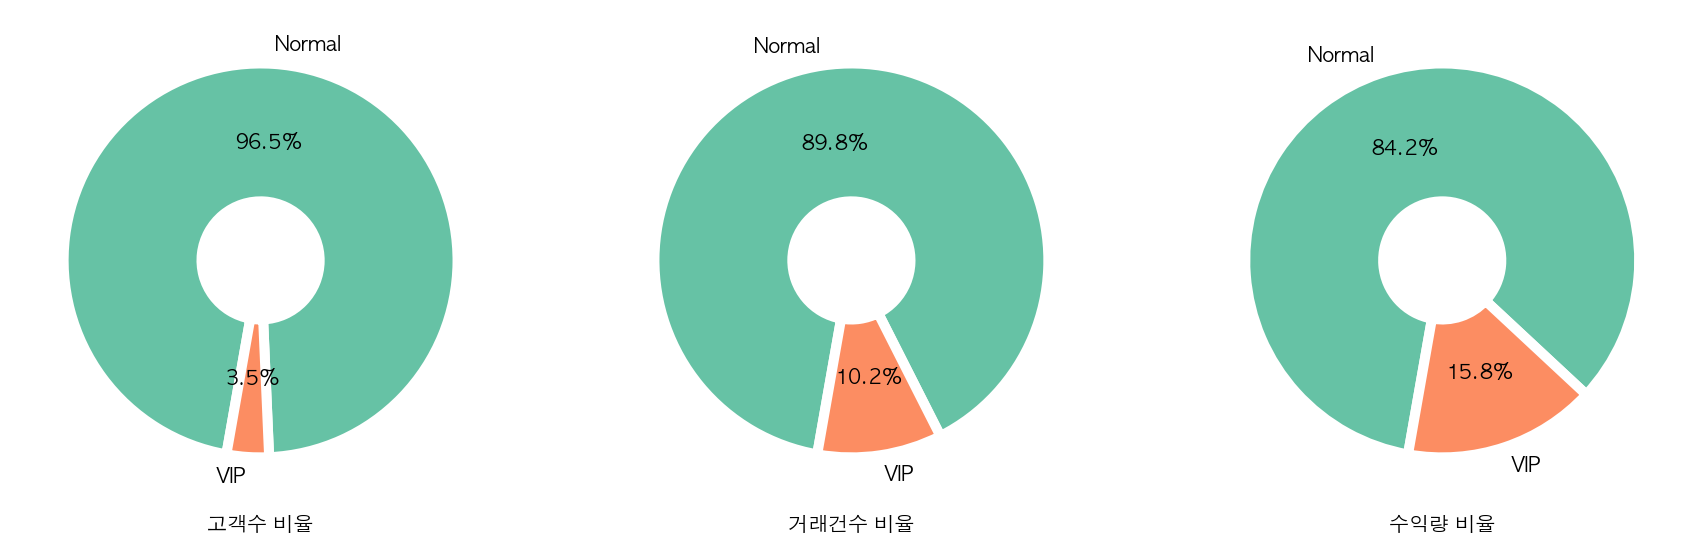

In [239]:
t3 = pt.groupby("vip").agg({"id": "count", "transaction_amount": "sum"})

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.pie([len(t), len(t2)], labels=["Normal", "VIP"], autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel("고객수 비율")

plt.subplot(1,3,2)
plt.pie(t3['id'], labels=["Normal", "VIP"], autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel("거래건수 비율")

plt.subplot(1,3,3)
plt.pie(t3['transaction_amount'], labels=["Normal", "VIP"], autopct='%.1f%%', startangle=260, colors=colors, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.xlabel("수익량 비율")

plt.show()

- vip 고객이 일반 고객보다 수익이 약 5배정도 많아 1) vip 고객을 늘리는 전략을 찾거 경우
- 일반 고객이 전체 수익의 84.2%를 차지하므로 2) 일반 고객에 focus를 두고 전략을 찾는 경우